## MSc Data Analytics - Capstone Project 

## Predictive Insights in the Coffee Market: Time Series Models for forecasting of coffee in the commodity stock market

Student id: 2020274 Clarissa Cardoso


### Introduction

This capstone project aims to apply different time series models to forecast the prices of coffee in the commodity stock market. Central to this analysis is the ICO Composite Indicator Price (I-CIP), which is a critical benchmark reflecting global coffee market trends. Accurate forecasting of the I-CIP is vital for stakeholders throughout the coffee industry, from producers to investors. The data utilized in this project is sourced from the International Coffee Organization's (ICO) Public Market Information, which provides the I-CIP values free of charge. 

For the early stages of this experimentation, 1 year worth of data was available to collect, from 01Feb23 to 29Feb24.

#### Objectives:

- Model Building: Develop and evaluate various time series forecasting models to predict future values of the I-CIP.
- Model Assessment: Assess the effectiveness and accuracy of different modeling techniques to capture the dynamic nature of the coffee market.


#### Methodology:

Between March and April: 
- Data Collection: gather historical I-CIP data from reliable sources, (spanning multiple years to capture a comprehensive view of market trends. but at least 1 year of data which is available for the time being) 
- Data Preprocessing: clean and preprocess the data, handling missing values, outliers, data imputation (?) to consistency for modelling
- Exploratory Data Analysis (EDA): conduct exploratory analysis to gain insights into the underlying patterns, seasonality, and trends present in the I-CIP data.

<br>
April/24
   
- Model Development: build and train various time series forecasting models, including traditional statistical models (e.g., ARIMA/Sarima) and machine learning algorithms (e.g., LSTM neural networks).
- Model Evaluation: evaluate the performance of each model using appropriate metrics, such as mean absolute error (MAE) and root mean squared error (RMSE), to determine their predictive accuracy.
- Forecasting: generate forecasts for future I-CIP values using the best-performing model(s) and visualize the results to facilitate interpretation and decision-making. 
    - 5 days = 1 week
    - 21 days = 1 month
    - 63 days = 3 months (1 quarter)


<br>
<br>
<br><br>
<br>
<br>
<br>
<br>
<br>
<br>






       
  <mark> considering the I-CIP values are a weighted average of 4 main types of beans commercialised(Colombian Milds,  Other Milds,  Brazilian Naturals, Robustas), how would the diffenret weights present during the eda, and how they could affect the final icip values? </mark>

### MODEL EVALUATION METRICS


<i>"To go further with model selection, you will need to define a metric to evaluate your models. A very often used model in forecasting is the Mean Squared Error. This metric measures the error at each point in time and takes the square of it. The average of those squared errors is called the Mean Squared Error. An often-used alternative is the Root Mean Squared Error: the square root of the Mean Squared Error. Another frequently used metric is the Mean Absolute Error: rather than taking the square of each error, it takes the absolute value here. The Mean Absolute Percent Error is a variation on this where the Absolute Error at each point in time is expressed as a percentage of the actual value. This yields a metric that is a percentage, which is very easy to interpret." (Joos Korstanje, 2023) <i/>https://neptune.ai/blog/select-model-for-time-series-prediction-task
    

- MAE
- MAPE
- RMSE

Both mae and rmse are dependent on the scaling of data, meaning all features must be in the same scale, but both are the most common metrics for evalutating model efficiency. For regression problems rmse is the standard metric because it provides a direct way to compare different models and is sensitive to larger errors which is the metric decided to be the main one analysed in this project. MApe on the other hand allows to compare models even if they are in different scales, giving a clear percentage measure for accuracy. Althoough sometimes rmse might get skwed if actual values are really small, which can obscure the error perception and affect final evaluations. 

#### Importing required libraries for the project

In [1]:
import keras
import tensorflow as tf

print("Keras version:", keras.__version__)
print("TensorFlow version:", tf.__version__)

## The kernel appears to have died. It will restart automatically. 
## cheking if keras/tensorflow are correclty installed 

Keras version: 2.10.0
TensorFlow version: 2.10.0


In [2]:
#importing libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd #dataframes 
import numpy as np #linear algebra
import seaborn as sns #visualization
sns.set(color_codes=True)


import plotly.express as px
import plotly.graph_objects as go


import scipy.stats as stats #statistical resources

import matplotlib.pyplot as plt #visualisation 
%matplotlib inline 


from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import matplotlib as mpl

from sklearn.model_selection import train_test_split # importing function to split the data training and test.
from sklearn.preprocessing import MinMaxScaler # Import the MinMaxScaler module from sklearn.preprocessing library
from sklearn.linear_model import LinearRegression # importing to performe linear regression. 
from sklearn.metrics import make_scorer, r2_score # Importing from Metrics module
from sklearn.preprocessing import StandardScaler # standardize the data
from sklearn import metrics # Metrics module from scikit-learn
from sklearn.model_selection import GridSearchCV # importing for hyperparameter tunning
from sklearn.metrics import mean_squared_error # importing mse
from scipy.stats import shapiro

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential #last update in python causing dead kernel wehn importing keras functions?
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from math import sqrt
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from scipy.interpolate import interp1d

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


### Importing files from os directory

In [3]:
import os
# Listing all the files in the folder
os.listdir("icip_2023") 

## folder contains the free data available in ICO's website, contains data from Feb/23 to Feb/24

['I-CIP_August_2023.csv',
 'I-CIP_September_2023.csv',
 '.DS_Store',
 'I-CIP_April_2023.csv',
 'I-CIP_March_2023.csv',
 'I-CIP_November_2023.csv',
 'I-CIP_Febuary_2024.csv',
 'I-CIP_January_2024.csv',
 'I-CIP_Febuary_2023.csv',
 'I-CIP_October_2023.csv',
 'I-CIP_June_2023.csv',
 'I-CIP_July_2023.csv',
 'I-CIP_December_2023.csv',
 'I-CIP_May_2023.csv']

Files are not in cronological orders, will affect the loop for calling the separate csv's, and cant import them  at the same time to concat them in one single dataframe?

this means the position of each file in the list is as: 

1. 'I-CIP_August_2023.csv', [0]
2.  'I-CIP_September_2023.csv',[1]
3. '.DS_Store',[not considered]
4. 'I-CIP_April_2023.csv',[2]
5. 'I-CIP_March_2023.csv',[3]
6. 'I-CIP_November_2023.csv',[4]
7. 'I-CIP_Febuary_2024.csv',[5] 
 

....
 


In [4]:
#create for loop to import csv files from the folder with less comands.

# create an empty list to store dfs
dataframes = []

# path to folder where csv files are (in this case same directory)
folder_path = "icip_2023"

for file in os.listdir(folder_path):
    if file.endswith(".csv"): #consider only csv files, ignore .DS_Store
        file_path = os.path.join(folder_path, file) #  Construct the full file path
        dataframes.append(pd.read_csv(file_path)) # Read the CSV file and append it to the list

In [5]:
#check the lenght of the directory, how many files exist in the folder
len(dataframes)

13

#### Chcking the heading of the files to undertand how features are allocated in this first stage

In [6]:
#check if order of files correspond with the directory list, testing if loop is working
dataframes[9].head()

,Unnamed: 0,Unnamed: 1,Colombian,Unnamed: 3,Brazilian,Unnamed: 5
0,NaN,I-CIP,NaN,Other Milds,NaN,Robustas
1,NaN,NaN,Milds,NaN,Naturals,NaN
2,01-Jun,173.56,220.40,215.27,181.78,126.54
3,02-Jun,175.62,222.41,216.73,181.98,130.57
4,05-Jun,173.15,219.54,213.37,180.94,127.53


In [7]:
#define a variable name for each dataset to facilitate data manipulation

feb24= dataframes[5]

In [8]:
#cheack first 5 rows of last dataset in the file corresponds to the most recent values from feb24

feb24.info()
print(feb24.shape)
print(feb24.isnull().sum())
feb24.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  21 non-null     object
 1   Unnamed: 1  22 non-null     object
 2   Colombian   22 non-null     object
 3   Unnamed: 3  22 non-null     object
 4   Brazilian   22 non-null     object
 5   Unnamed: 5  22 non-null     object
dtypes: object(6)
memory usage: 1.2+ KB
(23, 6)
Unnamed: 0    2
Unnamed: 1    1
Colombian     1
Unnamed: 3    1
Brazilian     1
Unnamed: 5    1
dtype: int64


,Unnamed: 0,Unnamed: 1,Colombian,Unnamed: 3,Brazilian,Unnamed: 5
0,NaN,I-CIP,NaN,Other Milds,NaN,Robustas
1,NaN,NaN,Milds,NaN,Naturals,NaN
2,01-Feb,185.24,213.15,212.01,190.15,156.09
3,02-Feb,183.69,212.32,212.94,188.41,153.01
4,05-Feb,180.93,210.11,209.12,185.69,150.65


importing a random dataset to see how the columsn are presented and try to undersand the data structure in place: a messy header and real data starts fromm third row.

First thing to adjust: collumn names and remove NaN values from second row.
- from the basic info function we can see the dates are not in correct format (need to convert to DD-MM-AAAA instead of 01-Feb) and all the values are not in int/float format, they are objects.

I want to combine bthe data from all csv files into a single dataframe for data manipulation but when importing them as panda df, need to make other adjustments - glob?? (https://stackabuse.com/bytes/importing-multiple-csv-files-into-a-single-dataframe-using-pandas-in-python/)

Common Errors as stated by Saturn Cloud (https://saturncloud.io/blog/loading-multiple-csv-files-from-a-folder-into-one-dataframe-a-comprehensive-guide/#1) 

    Incorrect file path: Not setting the working directory correctly or providing an invalid path to the folder containing the CSV files.

    Column mismatch: Assuming all files have the same column names and order. This can lead to errors when merging DataFrames with different structures.




### Combining all months into the same dataframe


In [9]:

        
### # Concatenate all DataFrames into a single DataFrame and remove null values
###merged_df = pd.concat(dataframes, ignore_index=True, dropna=True) could not include dropna in the same line because 
## concat function doesnt alow this method


# Concatenate all DataFrames into a single DataFrame
merged_df = pd.concat(dataframes, ignore_index=True)

# Remove null values from the concatenated DataFrame
#merged_df.dropna(inplace=True) this function removed all values, leaving an emppty df. 

# Display the merged DataFrame
print(merged_df)

    Unnamed: 0 Unnamed: 1 Colombian   Unnamed: 3 Brazilian Unnamed: 5  \
0          NaN      I-CIP       NaN  Other Milds       NaN   Robustas   
1          NaN        NaN     Milds          NaN  Naturals        NaN   
2       01-Aug     161.70    196.62       197.67    164.03     127.08   
3       02-Aug     163.62    198.66       199.72    166.00     128.82   
4       03-Aug     161.68    196.28       197.32    163.52     127.77   
..         ...        ...       ...          ...       ...        ...   
300     25-May        NaN    222.17       217.37    182.38     123.94   
301     26-May        NaN    220.39       215.81    180.94     123.98   
302     29-May        NaN    220.52       215.05    181.73     124.68   
303     30-May        NaN    215.91       210.53    177.23     124.47   
304     31-May        NaN    216.84       211.48    178.19     124.45   

    ICO Composite  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
.. 

setting dropna=True, any rows with null values will be removed from the concatenated DataFrame. However this function caused an empty dataframe? Also, the files are still not in cronological order, so need to find a way to import them in the correct order. When we remove the dropna function from the merged_df, at the same time the values get misplaced into a new column, which is also not adequate for manipulation.

In [10]:
merged_df.head()

,Unnamed: 0,Unnamed: 1,Colombian,Unnamed: 3,Brazilian,Unnamed: 5,ICO Composite
0,NaN,I-CIP,NaN,Other Milds,NaN,Robustas,NaN
1,NaN,NaN,Milds,NaN,Naturals,NaN,NaN
2,01-Aug,161.70,196.62,197.67,164.03,127.08,NaN
3,02-Aug,163.62,198.66,199.72,166.00,128.82,NaN
4,03-Aug,161.68,196.28,197.32,163.52,127.77,NaN


In [11]:
merged_df.tail()

,Unnamed: 0,Unnamed: 1,Colombian,Unnamed: 3,Brazilian,Unnamed: 5,ICO Composite
300,25-May,NaN,222.17,217.37,182.38,123.94,173.46
301,26-May,NaN,220.39,215.81,180.94,123.98,172.49
302,29-May,NaN,220.52,215.05,181.73,124.68,172.84
303,30-May,NaN,215.91,210.53,177.23,124.47,169.87
304,31-May,NaN,216.84,211.48,178.19,124.45,170.47


Before continuing, ill try to first rename the columns and remove the NaN values in each dataframe separately, to ensure all dfs will be in the same shape to facilitate concatenation, also might be easier to import them in the correct order once this is done?


In [12]:
# Define a list of new column names
new_column_names = {'Unnamed: 0': 'date', 
                    'Unnamed: 1': 'I-CIP', 'Colombian':'colombian_milds', 
                    'Unnamed: 3':'other_milds', 'Brazilian':'brazilian_nat', 'Unnamed: 5':'robustas'}


# Apply changes to each DataFrame separately
for df in dataframes:
    # Rename columns
    df.rename(columns=new_column_names, inplace=True)
    
    # Remove NaN values
  #  df.dropna(inplace=True) this one makes all dataframes empty again.

In [13]:
print(len(dataframes)) #check is list is not empty anymore

13


In [14]:
## can see the changes were applied and that also all dfs follow the same pattern of having NaN values on the 
## first 2 rows, so i can either perfom a similar loop to drop these rows and merge them in the correct order?
print(dataframes[1].head())
print(dataframes[2].head())
print(dataframes[4].head())
print(dataframes[8].head())
print(dataframes[6].head())
print(dataframes[3].head())
print(dataframes[10].head())

     date   I-CIP colombian_milds  other_milds brazilian_nat  robustas
0     NaN   I-CIP             NaN  Other Milds           NaN  Robustas
1     NaN     NaN           Milds          NaN      Naturals       NaN
2  01-Sep  152.36          184.05       183.14        151.88    124.26
3  04-Sep  152.01          183.75       182.60        151.43    124.09
4  05-Sep  153.02          185.15       184.01        152.88    124.34
     date      ICO Composite colombian_milds  other_milds brazilian_nat  \
0     NaN                NaN             NaN  Other Milds           NaN   
1     NaN  Indicator (I-CIP)           Milds          NaN      Naturals   
2  03-Apr             168.87          222.30       219.78        183.11   
3  04-Apr             168.14          220.82       218.29        181.52   
4  05-Apr             172.44          225.91       223.38        186.70   

   robustas  
0  Robustas  
1       NaN  
2    109.10  
3    109.80  
4    112.63  
     date   I-CIP colombian_milds  othe

In [15]:
# Drop the first two rows in each DataFrame that contain NaN
for df in dataframes:
    df.drop(df.index[:2], inplace=True)

In [16]:
#print test across different months to see changes
print(dataframes[1].head())
print(dataframes[2].head())
print(dataframes[4].head())
print(dataframes[8].head())

     date   I-CIP colombian_milds other_milds brazilian_nat robustas
2  01-Sep  152.36          184.05      183.14        151.88   124.26
3  04-Sep  152.01          183.75      182.60        151.43   124.09
4  05-Sep  153.02          185.15      184.01        152.88   124.34
5  06-Sep  153.39          186.34      185.01        154.83   122.74
6  07-Sep  151.58          181.98      185.21        151.52   121.88
     date ICO Composite colombian_milds other_milds brazilian_nat robustas
2  03-Apr        168.87          222.30      219.78        183.11   109.10
3  04-Apr        168.14          220.82      218.29        181.52   109.80
4  05-Apr        172.44          225.91      223.38        186.70   112.63
5  06-Apr        173.75          228.43      225.90        189.30   111.71
6  07-Apr        173.96          228.72      226.04        189.39   112.03
     date   I-CIP colombian_milds other_milds brazilian_nat robustas
2  01-Nov  153.32          187.15      186.58        158.95   117.8

In [17]:
#define a variable name for each dataset to facilitate data manipulation
# but now for each month, give them a variable so i can concat them in the correct order
# might be a but extra work but the lambda function didnt work even after renaming the original files and adding '_'
# also the natsorted library was not enabled in my machine
feb24= dataframes[5]
jan24=dataframes[6]
dec23=dataframes[11]
nov23=dataframes[4]
oct23=dataframes[8]
sep23=dataframes[1]
aug23=dataframes[0]
jul23=dataframes[10]
jun23=dataframes[9]
may23=dataframes[12]
apr23=dataframes[2]
mar23=dataframes[3]
feb23=dataframes[7]

In [18]:
print(dataframes)



[      date   I-CIP colombian_milds other_milds brazilian_nat robustas
2   01-Aug  161.70          196.62      197.67        164.03   127.08
3   02-Aug  163.62          198.66      199.72        166.00   128.82
4   03-Aug  161.68          196.28      197.32        163.52   127.77
5   04-Aug  158.15          192.33      192.15        159.20   126.01
6   07-Aug  160.76          194.43      194.65        161.75   128.91
7   08-Aug  160.03          192.70      193.63        160.61   129.03
8   09-Aug  158.62          191.14      191.37        158.39   128.88
9   10-Aug  158.26          191.29      191.28        158.61   127.69
10  11-Aug  155.96          188.35      187.47        155.31   127.33
11  14-Aug  151.31          183.40      182.46        149.96   123.60
12  15-Aug  150.92          182.53      181.59        149.34   123.86
13  16-Aug  149.07          181.45      180.49        147.98   120.90
14  17-Aug  149.34          181.10      179.23        148.87   121.72
15  18-Aug  149.68 

#another issue was identified from the original data here
the first 4 months contain a different column lables for the icip prices, probably somne changes in the way data was collected initially or some changes in ICO's processing techniques, and the merged.df added a column with  missing values in place for the 'ghost' feature, it seems to have 2 diffent names for the price column  even after i renamed the collumns in previuos lines (ICO Composite and I-CIP). So before i merge them toghether in cronolgical order, ill adjust these features. Or could i just merge the dfs without the labels?


Another issue here is the fact that the date format is not in the correct format, as mentioned above. So the idea is to adjust this in each file separetly before merging them togheter in the correct order, because when i first tried to add the YYYY/MM/DD altogether after merging the files in sequence, the values from feb 23 and feb 24 all returned as 2023 (probably should have given other parameters to consider, since this is the only month that repeates. the months between march and jan only appear one time each. 


      
         



In [19]:
# this function will hopefuly change the dates from i.e: '01-Jul' to '2023-07-01' 

def transform_date(df, year):
    # Define a dictionary mapping month abbreviations to their respective numbers
    month_mapping = {
        'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04',
        'May': '05', 'Jun': '06', 'Jul': '07', 'Aug': '08',
        'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'
    }

    # Apply the transformation to the 'date' column
    df['date'] = df['date'].apply(lambda x: '-'.join([str(year), month_mapping[x.split('-')[1]], x.split('-')[0]]))

    # Convert the 'date' column to datetime format
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

    return df

# Example usage:
# Assuming 'df' is your DataFrame for a specific month and '2023' is the year
# transformed_df = transform_date(df, 2023)

In [20]:
#testing if function is working
feb23 = transform_date(feb23, 2023)
print(feb23.head())

        date ICO Composite colombian_milds other_milds brazilian_nat robustas
2 2023-02-01        171.43          235.92      223.22        191.65   102.31
3 2023-02-02        172.50          237.34      226.26        192.86   102.00
4 2023-02-03        169.47          232.24      221.86        188.61   101.52
5 2023-02-06        171.29          235.17      224.80        190.77   102.02
6 2023-02-07        172.14          235.65      226.72        191.92   102.10


In [21]:
# apply transform_date to all files
feb24= transform_date(feb24, 2024)
jan24=transform_date(jan24, 2024)
dec23=transform_date(dec23, 2023)
nov23=transform_date(nov23, 2023)
oct23=transform_date(oct23, 2023)
sep23=transform_date(sep23, 2023)
aug23=transform_date(aug23, 2023)
jul23=transform_date(jul23, 2023)
jun23=transform_date(jun23, 2023)
may23=transform_date(may23, 2023)
apr23=transform_date(apr23, 2023)
mar23=transform_date(mar23, 2023)

In [22]:
# Define the list of DataFrames in the desired order
dfs_in_order = [feb23, mar23, apr23, may23, jun23, jul23, aug23, sep23, oct23, nov23, dec23, jan24, feb24]

# Concatenate the DataFrames
merged_df = pd.concat(dfs_in_order,ignore_index=True)

# Display the merged DataFrame
merged_df

,date,ICO Composite,colombian_milds,other_milds,brazilian_nat,robustas,I-CIP
0,2023-02-01,171.43,235.92,223.22,191.65,102.31,NaN
1,2023-02-02,172.50,237.34,226.26,192.86,102.00,NaN
2,2023-02-03,169.47,232.24,221.86,188.61,101.52,NaN
3,2023-02-06,171.29,235.17,224.80,190.77,102.02,NaN
4,2023-02-07,172.14,235.65,226.72,191.92,102.10,NaN
...,...,...,...,...,...,...,...
274,2024-02-23,NaN,204.48,202.46,183.74,149.40,177.80
275,2024-02-26,NaN,204.12,202.11,183.48,149.08,177.48
276,2024-02-27,NaN,207.11,205.10,186.34,151.51,180.23
277,2024-02-28,NaN,206.01,204.00,185.39,150.23,179.12


In [23]:
# Rename columns of the first four DataFrames to match the later DataFrames
feb23.rename(columns={'Unnamed: 0': 'date', 'ICO Composite': 'I-CIP'}, inplace=True)
mar23.rename(columns={'Unnamed: 0': 'date', 'ICO Composite': 'I-CIP'}, inplace=True)
apr23.rename(columns={'Unnamed: 0': 'date', 'ICO Composite': 'I-CIP'}, inplace=True)
may23.rename(columns={'Unnamed: 0': 'date', 'ICO Composite': 'I-CIP'}, inplace=True)

# Concatenate the DataFrames in the desired order
merged_df = pd.concat([feb23, mar23, apr23, may23, jun23, jul23, aug23, sep23, oct23, nov23, dec23, jan24, feb24], ignore_index=True)

# Display the merged DataFrame
print(merged_df)

          date   I-CIP colombian_milds other_milds brazilian_nat robustas
0   2023-02-01  171.43          235.92      223.22        191.65   102.31
1   2023-02-02  172.50          237.34      226.26        192.86   102.00
2   2023-02-03  169.47          232.24      221.86        188.61   101.52
3   2023-02-06  171.29          235.17      224.80        190.77   102.02
4   2023-02-07  172.14          235.65      226.72        191.92   102.10
..         ...     ...             ...         ...           ...      ...
274 2024-02-23  177.80          204.48      202.46        183.74   149.40
275 2024-02-26  177.48          204.12      202.11        183.48   149.08
276 2024-02-27  180.23          207.11      205.10        186.34   151.51
277 2024-02-28  179.12          206.01      204.00        185.39   150.23
278 2024-02-29  180.11          207.67      205.52        186.73   150.40

[279 rows x 6 columns]


## EDA

Perfom some basic eda to see how the data is presented after the merge
However, when looking at the .info output, before obtaining any sort of relevant eda i need to make the correct conversions for datatypes that can be used foer forecasting. It was also noted that having the dates as 01-Feb is not at all helpfull, so first need to add the year to facilitate the conversion https://pandas.pydata.org/docs/user_guide/timeseries.html It also does not consider the year of each datapoint. 



In [24]:
# Summary Statistics
print(merged_df.info())
merged_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             279 non-null    datetime64[ns]
 1   I-CIP            279 non-null    object        
 2   colombian_milds  279 non-null    object        
 3   other_milds      279 non-null    object        
 4   brazilian_nat    279 non-null    object        
 5   robustas         279 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 13.2+ KB
None


,date,I-CIP,colombian_milds,other_milds,brazilian_nat,robustas
count,279,279,279,279,279,279
unique,279,270,274,273,272,267
top,2023-02-01 00:00:00,173.84,192.70,212.69,180.94,126.65
freq,1,2,2,3,2,3
first,2023-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,2024-02-29 00:00:00,NaN,NaN,NaN,NaN,NaN


In [25]:
# Convert numerical columns to numeric type

#merged_df['date'] = pd.to_datetime(merged_df['date']) 

merged_df['I-CIP'] = pd.to_numeric(merged_df['I-CIP'])
merged_df['colombian_milds'] = pd.to_numeric(merged_df['colombian_milds'])
merged_df['other_milds'] = pd.to_numeric(merged_df['other_milds'])
merged_df['brazilian_nat'] = pd.to_numeric(merged_df['brazilian_nat'])
merged_df['robustas'] = pd.to_numeric(merged_df['robustas'])

# Confirm the data types after conversion
print(merged_df.dtypes)

date               datetime64[ns]
I-CIP                     float64
colombian_milds           float64
other_milds               float64
brazilian_nat             float64
robustas                  float64
dtype: object


In [26]:
merged_df.head(10)

,date,I-CIP,colombian_milds,other_milds,brazilian_nat,robustas
0,2023-02-01,171.43,235.92,223.22,191.65,102.31
1,2023-02-02,172.50,237.34,226.26,192.86,102.00
2,2023-02-03,169.47,232.24,221.86,188.61,101.52
3,2023-02-06,171.29,235.17,224.80,190.77,102.02
4,2023-02-07,172.14,235.65,226.72,191.92,102.10
5,2023-02-08,171.23,234.06,225.13,190.38,102.35
6,2023-02-09,169.89,232.17,223.54,188.61,101.71
7,2023-02-10,170.31,233.38,223.14,189.73,101.76
8,2023-02-13,171.50,235.34,224.91,191.24,102.06
9,2023-02-14,175.86,241.56,231.13,197.28,103.26


In [27]:
print(merged_df.tail())
print(merged_df.shape)

          date   I-CIP  colombian_milds  other_milds  brazilian_nat  robustas
274 2024-02-23  177.80           204.48       202.46         183.74    149.40
275 2024-02-26  177.48           204.12       202.11         183.48    149.08
276 2024-02-27  180.23           207.11       205.10         186.34    151.51
277 2024-02-28  179.12           206.01       204.00         185.39    150.23
278 2024-02-29  180.11           207.67       205.52         186.73    150.40
(279, 6)


In [28]:
merged_df.describe()

,I-CIP,colombian_milds,other_milds,brazilian_nat,robustas
count,279.000000,279.000000,279.000000,279.000000,279.000000
mean,167.806344,208.039391,205.646452,175.466631,125.725233
std,10.987927,18.839311,16.566665,15.712895,14.122864
min,145.990000,178.820000,174.970000,147.660000,101.520000
25%,158.515000,191.510000,192.210000,160.720000,117.625000
50%,170.110000,206.310000,204.100000,179.980000,124.470000
75%,176.955000,225.185000,220.645000,188.370000,131.700000
max,187.290000,249.040000,242.710000,207.450000,158.780000


 Considering the ICIP values, we have 279 data points showing the prices of the I-CIP. On average, the price is about 167.80 usd. The prices range from as low as 145.99usd to as high as 187.29usd showing some flutctuation over the 1 year of data collected so far. Most of the prices (from the 25th to the 75th percentile) fall between 158.51usd and 176.95usd, with the median of 170 usd. This suggests that while the majority of prices are clustered around the average, there are some higher-priced outliers.

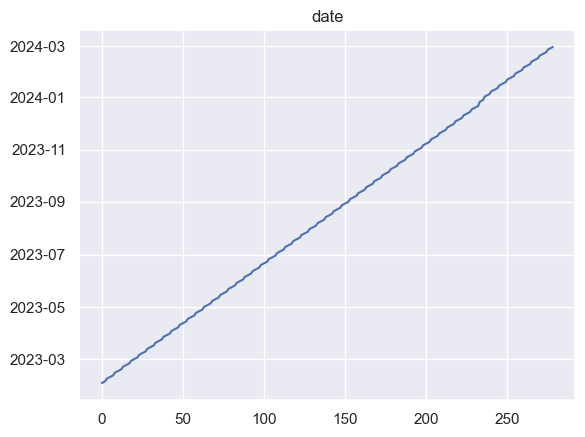

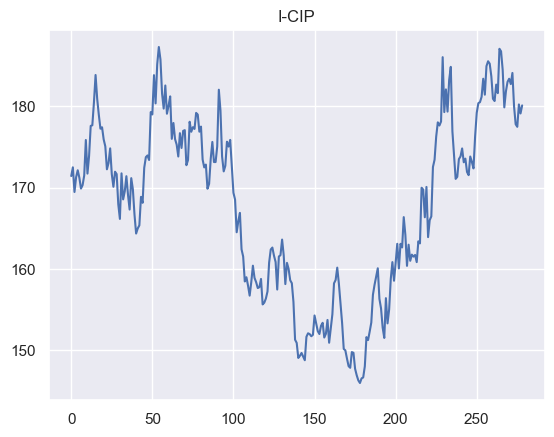

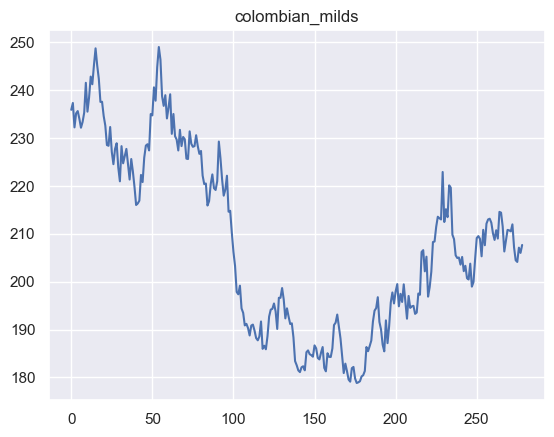

In [ ]:
for column in merged_df.columns:
    plt.plot(merged_df[column])
    plt.title(column)
    plt.show()
# tranform date column to correct datetime type and make it as index!

In [ ]:
import matplotlib.pyplot as plt

# Iterate over columns and plot each one on the same graph
plt.figure(figsize=(10, 6))
for column in merged_df.columns:
    if column != 'date':  # Exclude 'date' column from plotting
        plt.plot(merged_df['date'], merged_df[column], label=column)

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Line Graph of Column Values')
plt.legend()

# Show plot
plt.show()

In [ ]:
#date feature mmust be the index!

#create new variable for merged_df and reseting date as the index for building time series in later stages
# Set 'date' column as index
merged_df.set_index('date', inplace=True)

#print output
icip_df = merged_df
print(icip_df.head())

In [ ]:
icip_df.info()

### Checkin for Missing Values 


In [ ]:
icip_df.isna().sum()

In [ ]:
sns.boxplot(data=icip_df, orient='v', palette='Set2')
plt.title('Boxplot by Variable')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

 'I-CIP' has the narrowest interquartile range, indicating less variability in its values compared to the other categories. 'Robustas' not only has an outlier but also has the lowest median value and seems to have the most variability. 'Colombian_milds' and 'other_milds' have similar medians, but 'colombian_milds' displays a wider interquartile range, suggesting greater variability. The 'brazilian_nat' has its median below the 'colombian_milds' and 'other_milds', but above 'I-CIP' and 'robustas'.

In [ ]:
import plotly.graph_objects as go

# Define colors from the Set2 palette
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']

# Create boxplot traces
box_traces = []
for i, column in enumerate(icip_df.columns):
    box_trace = go.Box(y=icip_df[column], name=column, marker=dict(color=colors[i]))
    box_traces.append(box_trace)

# Create layout
layout = go.Layout(title='Boxplot by Variable', yaxis=dict(title='Value'), xaxis=dict(title='Variable'))

# Create figure
fig = go.Figure(data=box_traces, layout=layout)

# Show plot
fig.show()

In [ ]:
# Bar plot
plt.figure(figsize=(10, 6))
icip_df.mean().plot(kind='bar', color='skyblue')
plt.title('Mean Values of Variables')
plt.xlabel('Variables')
plt.ylabel('Mean')
plt.xticks(rotation=45)
plt.show()

### Checking Normality and Outliers

- Outliers: Data points significantly distant from the mean or outside the IQR.
- Z-score: Measures distance from the mean in terms of standard deviations.
- Interquartile Range (IQR): Indicates the spread of the middle 50% of the data.

Outliers can affect the analysis in many ways. They can skew your data and affect the mean and standard deviation, making it difficult to obtain accurate estimates. Outliers can also affect the regression line and lead to incorrect predictions. Therefore, it is crucial to identify and exclude outliers before conducting any analysis.

For the sake of this experient, at least at this fisrt stage only the I-CIP values will be considered for now. (however, i could also only attempt to forescast with one of the beans from the composite price: the 
So ill store the values on a separate datframe and check for distribution and outliers only with this feature.


Other things to consider:

 When dealing with stock prices and index prices, considering the frequency is an important attribute. In this case, using a frequency of 'B' for Business days, we must also include the holidays? but then which ones are considered by the ico to formulate this prices and how can i check the effects of them in the closing prices? 
 
On Priya Lingutla' tutorial, she mentions a way to also include the holidays in the analysis. Her project was based on sales demand using fb prophet, but for stock prices I am not entirely sure how the data could be affecte, since we use only closing prices for the predictions. Once the pirce is close it s https://github.com/priyalingutla/30-Days-Of-Data/blob/main/DAY%201%20Forecasting%20%2330daysofdata.ipynb
 
   
   "Futures contracts are financial derivatives that obligate the buyer to purchase an asset (in this case, coffee) or the seller to sell an asset at a predetermined future date and price. In the case of coffee futures, the price is typically determined based on various factors such as <b>supply and demand dynamics, weather conditions affecting coffee production, geopolitical events, and market sentiment<b/>."
    
 As of 20/mar - To gather more historical data on the icip values further back 22 on, i still dont have an answer from cct or ico, but there is a way to access yahoo finance api to collect the data from Brazilian naturals (arabica beans) https://finance.yahoo.com/quote/KCK24.NYB // https://www.nasdaq.com/articles/arabica-coffee-under-pressure-from-weakness-in-the-brazilian-real
        

In [ ]:
# Create a new DataFrame with only the 'date' and 'I-CIP' columns
price_df = icip_df[['I-CIP']].copy()

# Display the first few rows of the new DataFrame
print(price_df.head())

# Save the new DataFrame to a CSV file
price_df.to_csv('icip_prices.csv', index=False)


# To avoid having to repeatedly pull data using the Pandas data reader. 
#store new organised data in chronological order!

In [ ]:
price_df.info()

In [ ]:


# Create histogram
fig = px.histogram(price_df, x='I-CIP', nbins=30) #changing the number of bins makes the curve clearer, 10, 20 were also used

# Update layout
fig.update_layout(
    title='I-CIP Histogram',
    xaxis_title='Price',
    yaxis_title='Frequency'
)

# Show plot
fig.show()

In [ ]:
# Changing some of the aesthetics... adding in a kernel desnity estimate:
ax = sns.histplot(price_df['I-CIP'], kde=True, color ='green')
ax.set(xlabel='i-cip',
       ylabel='Frequency',
       title ="ICO Composite Prices  Histogram")

From the histogram above, we can see the data doensnt show a normal distribution of values, the graph below a kde is added to the plot to make it even clearer. The Bimodal distribution indicates the presence of two distinct groups within the dataset, each with its own central tendency. (two populations in the sample)
<br>
<br>

This often suggests that this dataset may be influenced by two different underlying processes or conditions.  In terms of comodity markets, for example,  a distribution like this one might reflect different market dynamics or consumption patterns across two separate seasons or market segments. 
 <br>
 The next step is to consider whether these modes represent meaningful segments that require additional analysis or modeling strategies. By fitting a <b>Gaussian Mixture Model</b> or exploring the data's skewness and kurtosis, we can dive deeper into understanding the characteristics of these subgroups, which can give more insight son how to proceed to tailoring the forecasting models. 




In [ ]:

# Create a figure with two subplots to check for distribution
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot histogram of icip prices in the first subplot
axs[0].hist(price_df['I-CIP'], bins=10)
axs[0].set_title('Histogram of I-CIP values')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

# Plot probability plot of prices in the second subplot
stats.probplot(price_df['I-CIP'], dist='norm', plot=axs[1])
axs[1].set_title('Probability Plot of Values')

# Adjust the layout to avoid overlapping titles and labels
plt.tight_layout()

# Show the plots
plt.show()

the data shows some characteristics of a normal distribution but with potential signs of bimodality and the presence of outliers or heavy tails. This can often happen in real-world data where multiple factors contribute to the observed values, which can lead to more complex distributions deviating from the ideally normal dist. 

In [ ]:

from scipy.stats import skew, kurtosis
from sklearn.mixture import GaussianMixture

# Visual Inspection
plt.hist(price_df['I-CIP'], bins=30, alpha=0.5, color='blue', density=True)
price_df['I-CIP'].plot(kind='density', color='green')
plt.title('Histogram and Density Plot')
plt.show()

# Check skewness and kurtosis
data_skewness = skew(price_df['I-CIP'])
data_kurtosis = kurtosis(price_df['I-CIP'])
print(f"Skewness: {data_skewness}")
print(f"Kurtosis: {data_kurtosis}")

# Fitting a Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=0).fit(np.expand_dims(price_df['I-CIP'], 1))
gmm_scores = gmm.score_samples(np.expand_dims(price_df['I-CIP'], 1))

print(f"GMM Converged: {gmm.converged_}") # Check if the algorithm has converged
print(f"GMM Weights: {gmm.weights_}") # Gives the weights of the two components

# Plotting the GMM results
plt.hist(price_df['I-CIP'], bins=30, alpha=0.5, color='blue', density=True)
plt.plot(np.linspace(min(price_df['I-CIP']), max(price_df['I-CIP']), len(gmm_scores)), np.exp(gmm_scores), color='red')
plt.title('Histogram with GMM-estimated Density')
plt.show()

- Skewness: negatively skewed data ( -0.23), suggests the asymmetry in the data is not very pronounced but says the left tail is sligly longer the right one. 

- Kurtosis: also a negative value of -1.1 that indicates that the distribution is flatter than a normal distribution with a lower peak. It also implies that the tails of the distribution are thinner, resulting in fewer extreme values (outliers) than you would expect in a normal distribution.



- GMM: captures the nuances of the data distribution better than a single Gaussian distribution would, reinforcing the idea that multiple subpopulations exist within the data. From the plot above, a multimodal distribution can be identified, marked by the multiple peaks in the histogram and the complex shape of the GMM density curve. This suggests that the data is derived from several subgroups rather than a single source, as highlighted by the density curve's multiple turning points that map out the various modes or even clusters within the data. https://scikit-learn.org/stable/modules/mixture.html#variational-bayesian-gaussian-mixture


In [ ]:
# Calculate Z-score for each data point
price_df['I-CIP_Zscore'] = (price_df['I-CIP'] - price_df['I-CIP'].mean()) / price_df['I-CIP'].std()

# Define threshold for outlier detection (e.g., Z-score > 3 or < -3)
outlier_threshold = 3

# Filter outliers based on the threshold
outliers = price_df[np.abs(price_df['I-CIP_Zscore']) > outlier_threshold]

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='date', y='I-CIP', data=price_df, label='Data points')
sns.scatterplot(x='date', y='I-CIP', data=outliers, color='red', label='Outliers')
plt.title('Scatter Plot of I-CIP Prices with Outliers')
plt.xlabel('Date')
plt.ylabel('I-CIP Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()

The dataset contains 279 observations, ranging between February 1, 2023, to February 29, 2024.
It consists of 5 columns, all of which are now numeric (float64 dtype) and a DatetimeIndex
There are no missing values in any of the columns in the present dataframe.

However, if we consider the entire range of days between the fisrt and last day, there is a considerable gapof over 100 days for the continious period in the index. The values are presumably collected between mon-fri, so it does not include weekends and/or holidays to the original dataframe. 
<br>
<br>
<br>
Considering the ICO uses usd for their commercial practices, only the US holidays would be considered to be added to the dataset. using pandas libary 'holidays' the missing dates can be found. this is important before aplying forecasting models because they require a sequencial order of index to predict future values, and even our dataset doenst display missing values, there are actual dates missing from the datacollection. 



In [ ]:
## Checking how many days are present in the dataset

print(f'Dataframe contains prices between {icip_df.index.min()} {icip_df.index.max()}')
print(f'Total Days = {icip_df.index.max() - icip_df.index.min()} days')

In [ ]:
price_df.head()

In [ ]:
icip_df.head()

### Checking montly seasonality

These boxplots can help to visualize how each month behaves across the year we have data. 

In [ ]:
#
#
#icip_df.index = pd.to_datetime(icip_df.index)

# Extract year and month from the index
icip_df['year'] = icip_df.index.year
icip_df['month'] = icip_df.index.month_name().str[:3]  # This will give you the three-letter month abbreviation.

# Now 'icip_df' will have 'year' and 'month' columns with the respective year and three-letter month abbreviation.

In [ ]:
#adding month column
#icip_df['month'] = icip_df.date.dt.month

# Draw Plot
plt.figure(figsize=(12, 7), dpi=80)
sns.boxplot(x='month', y='I-CIP', data=icip_df)

# Set Title
plt.title('Month-wise Box Plot of I-CIP Prices of 2023\n(The Seasonality)', fontsize=18)

# Show the plot
plt.show()

When comparing across months, the distribution of prices in the later months (like November and December) differs from the earlier months (such as February and March), which could imply changes in market conditions or supply and demand dynamics throughout the year.

- Price Volatility: The varying heights of the boxes indicate that price volatility changes throughout the year. Some months, like February, March, and April, show greater variability in I-CIP prices, while others, such as August and September, appear more stable.

- Outliers: There are a few outliers, particularly in months like September and November. These could indicate unusual market events or data anomalies.
- The medians of the boxes show a cyclical pattern, suggesting that I-CIP prices may have a seasonal component, with certain months typically having higher or lower prices.

In [ ]:
icip_df.head()

## Decomposing data for Seasonality and Trend 

 For a series to be classified as stationary, it should not exhibit a trend. From thw visualisations above, we can assume there is a positive trend at the first half of the graph, with a sharp decrease in the end of the dataset.  "Predicting future values is easier with a stationary series, enhancing the precision of statistical models. Thus, for effective predictions, ensuring stationarity is crucial." https://www.analyticsvidhya.com/blog/2018/09/an-introduction-to-non-stationary-time-series-in-python/

The first part of the next code will consists of a lineplot to visualize the time series data of how the values change over time. Next is performed a seasonal decomposition for each column in the DataFrame. It iterates over each column, decomposes the time series into trend, seasonal, and residual/noise components using the seasonal decompose function from statsmodels, and plots the decomposed components. This helps in understanding the underlying patterns and trends in the data.

"Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting." Brownlee,2020 https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

"Decomposition is the process of breaking down a time series into its constituent components, typically trend, seasonality, and residual (noise). Trend represents the long-term movement or directionality of the data, seasonality captures periodic fluctuations, and residual represents random fluctuations or noise. Decomposition helps understanding the underlying patterns in the data before modeling and forecasting" Dey, 2024 (https://medium.com/@roshmitadey/time-series-decomposition-62cbf31ab65e)
Bonaros, 2021 (https://towardsdatascience.com/time-series-decomposition-in-python-8acac385a5b2)

Finally, the last part of the code returns the autocorrelation function (ACF) and partial autocorrelation function (PACF) plots for each column in the DataFrame. 
Each plot gives us insights about the autocorrelation and partial autocorrelation at different lags, to help identify the order of autoregressive (AR) and moving average (MA) terms for time series modeling.


Other ways to decompose data for timeseries models, (advanced tecniques for more complex, irregular or non-stationary data)
- Seasonal and Trend decomposition using Loess (STL)
- Wavelet Decomposition
- Singular Spectrum Analysis (SSA):

(Dey, 2024)

In [ ]:
#checking the versions of keras and tensorflow for this notebook
# anaconda needs to be set on base(root)!!!! (do not use anaconda3
#otherwise kernel will die while running)
import keras
import tensorflow as tf

print("Keras version:", keras.__version__)
print("TensorFlow version:", tf.__version__)

### Visualizing the time series for Coffee prices

In [ ]:

# Initially had the seasonal deco and ACF of all columns gathered in the same code, 
#ended up being too crowded/poluted and hard to comprehend. They are marked as comments bellow. 

# Visualize how values change over time
price_df['I-CIP'].plot(figsize=(12, 6))
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Seasonal decomposition
#for column in icip_df.columns:
 #   decomposition = seasonal_decompose(icip_df[column], model='additive', period=5)
  #  decomposition.plot()
   # plt.suptitle(f'{column} Decomposition')
    #plt.tight_layout()  # Add this line to adjust subplot parameters
    #plt.show()

# ACF and PACF plots
#for column in icip_df.columns:
 #   fig, ax = plt.subplots(2, 1, figsize=(10, 6))
  #  plot_acf(icip_df[column], ax=ax[0], lags=40)
   # plot_pacf(icip_df[column], ax=ax[1], lags=40)
    #ax[0].set_title(f'ACF and PACF for {column}')
    #plt.tight_layout()  # Add this line to adjust subplot parameters
    #plt.show()

From the timeseries plot above, overall we can see most of the features folow a similar pattern. The 'robustas' feature, however not only has the lowest values compared to other beans but it also display a unusiul pattern at least at the begining of the year (many unknown reasons for that... a- not being in harvest season; b- the assumption there are less farms producing this beans because historically is cheaper and dont have a substantial demand as the natural beans, bringing less return to farmers and therephore a smaller volume being traded on the markets, c- stereotype that robusta beans are less 'noble' than natural and often times are not considered for the speciality coffee parameters because of 'less flavou notes or weaker tasting profiles?')
The robustas line show a steady but modest increase until july where its pattern atarts to match with the other beans, with slight ups and downs  until nov23 where the curve finds a cresent point follwed bya sharp (?) descrease in mid january .



For this next line will extract the I-CIP column for shorten the analysis, at least in the early stage. Having a separate df containing data only from the date and icip values to start a more simple version to prepare the data for modeling. 

- Using autoregressor models and compare simple regression models (linear, logaritimc, lasso) to LSTM or other deep learning model in later sections in this notebook.



### Seasonal decomposition for each column



Seasonal decomposition using moving averages.


https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html#statsmodels.tsa.seasonal.seasonal_decompose-parameters


In [ ]:
# Assuming 'icip_df' is your dataframe and it has a DatetimeIndex.
columns = ['I-CIP', 'colombian_milds', 'other_milds', 'brazilian_nat', 'robustas']

for column in columns:
    decomposition = seasonal_decompose(icip_df[column], model='additive', period=5)
    
    # Plotting the decomposition
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))
    decomposition.observed.plot(ax=ax1)
    ax1.set_ylabel('Observed')
    decomposition.trend.plot(ax=ax2)
    ax2.set_ylabel('Trend')
    decomposition.seasonal.plot(ax=ax3)
    ax3.set_ylabel('Seasonal')
    decomposition.resid.plot(ax=ax4)
    ax4.set_ylabel('Residual')

    plt.suptitle(f'{column} Decomposition with period = 5')
    plt.tight_layout()  # Adjust subplot parameters
    plt.show()



Seasonal Decomposition with multiple periods of 1(daily)/5(weekly)/12/30/60    (180/360 not possible because dataset is too small)
and different models (additive or multiplicative)

Multiplicative Model as 
A multiplicative model suggests that the components are multiplied together, as stated by Brawlee (2020) https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

<i> y(t) = Level * Trend * Seasonality * Noise </i>

- A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time.

- A nonlinear trend is a curved line.

- A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time.

As we are dealing with real data, it can usually be affected by different trends over a set time, in this case for icip prices, we first notice a positive trend followed by a negative trend between may-sep, with another increase after oct23, showing a tendency to a more cyclical pattern. 

To extract the trend and seasonality factor from the I-CIP prices isolated from the rest of the dataset to get more detail only from the composite index will consider 3 different periods assuming the business days lags: 


- 63 for Quarterly 
- 21 for montly  *(assuming a 5-day week and no public holidays)*
- 5 for weekly

These periods dictate how the seasonal component of the decomposition is calculated, where each period represents the length of the cycle the seasonality is measured.

Given the nature of the dataset (containig values of 281 days) is not possible to decmpose for longer periods simply for the lack of data from continous/longer periods. 

In [ ]:
# Seasonal decompositions with different periods.

periods = [63, 21, 5]  # Quartely, Monthly and Weekly (considering business days)
# Function to generate the plots for all periods.
for period in periods:
    decompositions = seasonal_decompose(icip_df['I-CIP'], model='additive', period=period)

    # Plotting the components of the decomposition
    plt.rcParams.update({'figure.figsize': (8,8)})
    print(f"Seasonal Decomposition with Period = {period}")
    decompositions.plot()
    plt.show()

### I-CIP decompose with multiplicative model


In [ ]:
# Perform seasonal decomposition with different parameters
decomposition = seasonal_decompose(icip_df['I-CIP'], model='multiplicative', period=21)#montly
decomposition.plot()
plt.suptitle( 'Decomposition of I-CIP values period = 21')
plt.tight_layout()  # Add this line to adjust subplot parameters
plt.show()


No apparent trend is identified comparing per month (20 business days), however there is a high seaonal effect on the monthly data. This could be connected with the behavious observed in the early graphs, where we see higher prices in the first months of the year and a significant decline from june to october and the again a sutle increase in the prices at the end of the year. Both the weekly and montly osci;lations mark the volatility present in real data, specially in stock market analisis this presents a set of chalanges to obtain better predictions.


As for the residuals, observing the weekly behaviour there is only white noise, not following any partern, while monthly we see a different behaviour, in a constant pattern (1), less noise in the multiplicative model - using a period of 20 the trend is going up and down, cant really understand the undelyng trend is in the dataset due to the fluctuation.



### Decomposition with a period of 5 (weekly for business days)

In [ ]:
result = seasonal_decompose(icip_df['I-CIP'], model='multiplicative', period=5) #weekly

# Plot the original and decomposed components
plt.figure(figsize=(12, 8))




plt.subplot(4, 1, 1)
plt.plot(icip_df['I-CIP'], label='Original')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend()

plt.suptitle( 'Decomposition of I-CIP values period = 5')
plt.tight_layout()
plt.show()

### Decomposition with a period of 1 (daily)

In a well-defined seasonal decomposition, the period should reflect the actual cyclicity in the data. 

For instance:

- For daily data with a weekly pattern, the period should be 7 (days in a week) => (5 in business days)

In this case, having a period=1 doesnt translate into much info, because it consider each observation as a cycle
This can lead to a meaningless decomposition and is typically not used for timeseries, because it would suggest that every single data point represents a complete cycle, which eliminates the concept of seasonality.

https://towardsdatascience.com/time-series-from-scratch-decomposing-time-series-data-7b7ad0c30fe7
https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/


In [ ]:
result = seasonal_decompose(icip_df['I-CIP'], model='multiplicative', period=1) #daily

# Plot the original and decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(icip_df['I-CIP'], label='Original')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend()

plt.suptitle( 'Decomposition of I-CIP values period = 1')
plt.tight_layout()
plt.show()

- No aparent trend or seasonality considering daily lags. 

### Decomposition with a period of 21 (montly business days)

 from the seasonal section of graph, it  seems to be present a **regular fluctuation in coffee prices with peaks and troughs that repeat every 21 days** 
 
 in terms of residuals,  if there are significant patterns in the residuals, it could indicate that some aspects of seasonality or trend have not been fully captured by the model. (residulas: the more random the "better" = more white noise



"Residual: These are the irregularities or 'noise' that cannot be attributed to the trend or seasonality. It represents the randomness or irregular occurrences in the data after removing the trend and seasonal components. Ideally, the residuals should not show any pattern (be white noise) if the model has captured all the systematic information in the data." https://towardsdatascience.com/time-series-decomposition-8f39432f78f9#:~:text=Compute%20the%20seasonal%20component%2C%20S,%2F(TR)%20for%20multiplicative%20model.





In [ ]:
result = seasonal_decompose(icip_df['I-CIP'], model='multiplicative', period=21) #montly BD

# Plot the original and decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(icip_df['I-CIP'], label='Original')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend()


plt.suptitle( 'Decomposition of I-CIP values period = 21')
plt.tight_layout()
plt.show()

In [ ]:
icip_df['I-CIP'].info()

In [ ]:
%whos pd.Series

Decomposition with a period of 63 (quartely)

In [ ]:
result = seasonal_decompose(icip_df['I-CIP'], model='multiplicative', period=63) #Quarterly

# Plot the original and decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(icip_df['I-CIP'], label='Original')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend()



plt.suptitle( 'Decomposition of I-CIP values period = 63')
plt.tight_layout()
plt.show()

In [ ]:
# Using statmodels: Subtracting the Trend Component.

# Ensure the index is set correctly as a datetime index
icip_df.index = pd.to_datetime(icip_df.index)

# Now decompose with the known period
result_mul = seasonal_decompose(icip_df['I-CIP'], model='multiplicative', period=5, extrapolate_trend='freq')

# Subtract the trend from the original data to detrend
detrended = icip_df['I-CIP'] - result_mul.trend

# Now you can plot the detrended data
plt.figure(figsize=(12, 6))
plt.plot(detrended, label='Detrended Data')
plt.title('I-CIP prices detrended by subtracting the trend component')
plt.legend()
plt.show()

In [ ]:
detrended.describe()

In [ ]:
# Subtracting the Trend Component.

# 
# Perform seasonal decomposition
result_mul = seasonal_decompose(icip_df['I-CIP'], model='multiplicative', period=5, extrapolate_trend='freq')

# Deseasonalize
deseasonalized = icip_df['I-CIP'] / result_mul.seasonal

# Plot the deseasonalized data
plt.figure(figsize=(12, 6))
plt.plot(deseasonalized, label='Deseasonalized Data')
plt.title('I-CIP values Deseasonalized', fontsize=16)
plt.legend()
plt.show()

seems to not have changed at all in the pattern from the original data? 

literature says i showld add a log values/ differenciated to have a better detrending pattern,


In [ ]:
deseasonalized.head()

In [ ]:
# Plot the data
deseasonalized.plot(figsize=(14, 7))
plt.title('Time Series Data')
plt.show()

# Perform a seasonal decomposition to infer potential seasonality
result = seasonal_decompose(deseasonalized, model='multiplicative', period=5)
result.seasonal.plot(figsize=(14, 7))
plt.title('Seasonal Decomposition - Seasonality Component')
plt.show()

# ACF and PACF plots
plot_acf(deseasonalized.dropna(), lags=40)  # Adjust lags as needed
plt.title('Autocorrelation Function')
plt.show()

plot_pacf(deseasonalized.dropna(), lags=40, method='ywm')  # Adjust lags as needed and use method='ywm' to avoid statistical issues
plt.title('Partial Autocorrelation Function')
plt.show()

In [ ]:
icip_df

## Lag plots

understanding the entropy of icip prices and how correlated they are


In [ ]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

lp = icip_df['I-CIP']

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(lp, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

    
fig.suptitle('Lag Plots of I-CIP prices \n(Points get wide and scattered with increasing lag -> lesser correlation)\n', y=1.15)    

plt.show

the scatter plot above shows the relationship between observations and their lags.
<br> "as the lag increases, the correlation between the time series and its lags generally decreases."

Some sort of autocorrelation in the data is visible in lag 1, (t+1). A strong linear relationship indicates a high correlation between an observation and its immediate predecessor.  a similar pattern is observed in lag2, with a few datapoints begining to get apart. Lags 3 and 4 are already more spreaded, meaning the correlation between values is also decreasing as the interval between lags grow. 


In [ ]:
 from pandas.plotting import lag_plot

# Define the number of lags for 1 month
number_of_lags = 21

# Create subplots with 3 columns
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Generate a lag plot for each lag
for i in range(1, number_of_lags + 1):
    lag_plot(icip_df['I-CIP'], lag=i, ax=axes[i-1])
    axes[i-1].set_title(f'Lag {i}')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

## Rolling average / Rolling standard deviation 

Rolling Mean:
The rolling mean is the average of the previous observation window, where the window consists of a series of values from the time series data. Compute the mean for each ordered window. This can significantly help minimize noise in time series data.

In [ ]:
## Rolling Statistics at different periods
window_sizes = [5, 21, 63]  # A week, a month, a quarter,  (approximately)
data_close = icip_df['I-CIP']  

for window in window_sizes:
    rolling_mean = icip_df['I-CIP'].rolling(window=window).mean()
    rolling_std = icip_df['I-CIP'].rolling(window=window).std()
    
    plt.figure(figsize=(14, 5))
    plt.plot(icip_df['I-CIP'].index, icip_df['I-CIP'], label='Original')
    plt.plot(rolling_mean.index, rolling_mean, label=f'Rolling Mean (window={window})')
    plt.plot(rolling_std.index, rolling_std, label=f'Rolling Std Dev (window={window})')
    plt.title(f'Rolling Mean and Standard Deviation (window size = {window})')
    plt.legend()
    plt.show()

From the roling statistics plot with 5, 21 and 63 as windows, it seems that the series exhibits some periodicity, as the rolling mean with larger windows captures a smoother trend over time.

<i> The choice of window size can greatly affect the rolling statistics. 
 Smaller windows will follow the original series more closely, and capture short-term trends, while the larger windows will smooth out the series more, showing long-term trends. 
    
- If the rolling standard deviation changes significantly over time, this is an indication of **heteroscedasticity** (??????), which might need to be addressed. in this case, with a window of 5, the green line representing std has a smaller variance as compared to higher windows, but overall the volatility is not extremetly high. Altough when we look at the 63 window (3month period), the roling standard deviatios shows a slight curve between july/sept 23 and then agina at jan 24. 

#### Granger Causality test to estimate forecastbility

Granger causality is based on prediction and does not necessarily imply a true causal relationship. <mark>it basically calculates the prediction of how easy it is to forecast next values (??)<mark/>

For GC test data must be stationary. If the data series have trends or unit roots, the results of the Granger causality tests can be misleading, requering different steps before aplying it (ie: make it stationary by differenciating)
<br>

based on the relatively hogh p-values for each of the lags analysed (0.38 and p=0.46), there is no evidence to reject the null hypothesis, and it can be said that there is no statistical evidence of Granger causality from the tested lags of the first time series to the second time series.

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
#df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
icip_df['month'] = icip_df.index.month
grangercausalitytests(icip_df[['I-CIP', 'month']], maxlag=2)

### Seasonal decomposeof I-CIP prices for a period = 22


In [ ]:
# Plot the data
icip_df['I-CIP'].plot(figsize=(14, 7))
plt.title('Time Series Data')
plt.show()

# Perform a seasonal decomposition to infer potential seasonality
result = seasonal_decompose(icip_df['I-CIP'], model='multiplicative', period=22)  # Change to 'multiplicative' if that model fits better
result.seasonal.plot(figsize=(14, 7))
plt.title('Seasonal Decomposition - Seasonality Component')
plt.show()

# ACF and PACF plots
plot_acf(icip_df['I-CIP'].dropna(), lags=40)  # Adjust lags as needed
plt.title('Autocorrelation Function')
plt.show()

plot_pacf(icip_df['I-CIP'].dropna(), lags=40, method='ywm')  # Adjust lags as needed and use method='ywm' to avoid statistical issues
plt.title('Partial Autocorrelation Function')
plt.show()

**SEASONALITY PLOT** useful for understanding the repetitive patterns at regular intervals over time. 
The seasonality component obtained from decomposition shows clear regular spikes, suggesting some form of seasonality in the original data. <mark> <i> is there a way to find specific cycles wihthin the data?? <mark/> <i/>

on the acf plot, on the other hand, doesnt show any clear apikes, but a gradual decline as the lags increase. 
    
    This coulbe an indicative that ARIMA may not be the most suited model to apply, as seen later, that is why the forecasting results are not the most adequate.

### Seasonal decomposeof I-CIP prices for a period = 63 (quartely)


In [ ]:
# Plot the data
icip_df['I-CIP'].plot(figsize=(14, 7))
plt.title('Time Series Data')
plt.show()

# Perform a seasonal decomposition to infer potential seasonality
result = seasonal_decompose(icip_df['I-CIP'], model='multiplicative', period=63)  # Change to 'multiplicative' if that model fits better
result.seasonal.plot(figsize=(14, 7))
plt.title('Seasonal Decomposition - Seasonality Component')
plt.show()

# ACF and PACF plots
plot_acf(icip_df['I-CIP'].dropna(), lags=63)  # Adjust lags as needed
plt.title('Autocorrelation Function')
plt.show()

plot_pacf(icip_df['I-CIP'].dropna(), lags=63, method='ywm')  # Adjust lags as needed and use method='ywm' to avoid statistical issues
plt.title('Partial Autocorrelation Function')
plt.show()

. The lack of sharp cutoffs or distinct drops at specific lags for the ACF plot can suggest that there might not be a strong seasonal pattern with a fixed and short seasonal period, or the seasonality could be of a non-standard form which doesn't align neatly with the chosen lag intervals.


- The PACF plot is a little bit more direct in helping to determine the order of autoregressive terms (p) in ARIMA models. there's a significant spike at lag 1, and then it quickly falls into the confidence interval which would typically suggest an AR(1) process. However, there are no other significant spikes at higher lags that stand out, which suggests that an ARIMA model with a simple AR(1) term may be appropriate for this series. 

thisngs to still consider: 

Differencing to remove the trend and make the series stationary before applying ACF and PACF.
Using a non-seasonal ARIMA model based on the ACF and PACF plots.
Exploring models that can capture long-term cycles or trends more effectively, such as ARIMA with a drift term, or using a different approach such as Holt-Winters exponential smoothing if a seasonal period can be more clearly identified.
Investigating non-time series-based models, like machine learning regression models that can capture complex patterns and cycles in the data without the need for explicitly defining the seasonality period.

###  autocorrelation

- The distance between peaks or troughs can give you an indication of the length of the seasonal cycle.
- The gradual decline from 1 at lag 0 indicates how the correlation between the values decreases as the lags increase
- The significant negative autocorrelation at higher lags could be due to the ??? complex seasonal pattern? 


As a complement to the plot above to reiterate the lack of a defined trend, but the high inlfuence of seasonality. ?

In [ ]:
from pandas.plotting import autocorrelation_plot
#df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(icip_df['I-CIP'].tolist())

### Statistical tests for Seasonality


In [ ]:


# using daily data and interested in montly seasonality
decomp = seasonal_decompose(price_df['I-CIP'], model='multiplicative', period=63)

# Plotting the seasonal component
decomp.seasonal.plot()
plt.title('Seasonal Decomposition - Seasonality Component')
plt.show()

## Fourier Analysis (identify dominant cycles, if any):
The Fourier transform can help remove noise by transforming time series data into the frequency domain, allowing us to filter out noise frequencies. Then, the Fourier inverse transform is applied to obtain the time series after filtering
https://medium.com/@tubelwj/guide-to-time-series-data-pre-processing-methods-0a6df7ee054f

In [ ]:
# Perform a Fourier transform
fft_result = np.fft.rfft(price_df['I-CIP'])
frequencies = np.fft.rfftfreq(len(price_df['I-CIP']), d=1)  # d is the sample spacing

# Plotting the power spectrum
power_spectrum = np.abs(fft_result)
plt.plot(frequencies, power_spectrum)
plt.title('Fourier Analysis - Power Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

 #### Ljung-Box Q Test:
 
 Autocorrelation is significant, as indicated by the Ljung-Box Q test. It implies that past values are predictive of future values, which is an essential characteristic to include in any forecasting model. 
 The **p-value of 0.0** reinforces the interpretation  from the Seasonality Component plot, indicating that there's a true seasonal pattern in the data.

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Let's test for autocorrelation up to 22 lags, which should cover up to montly seasonality
ljung_box_result = acorr_ljungbox(price_df['I-CIP'], lags=[22], return_df=True)
print(ljung_box_result)

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Let's test for autocorrelation up to 5 lags, which should cover up to weekly seasonality
ljung_box_result = acorr_ljungbox(price_df['I-CIP'], lags=[5], return_df=True)
print(ljung_box_result)

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Let's test for autocorrelation up to 22 lags, which should cover up to montly seasonality
ljung_box_result = acorr_ljungbox(price_df['I-CIP'], lags=[63], return_df=True)
print(ljung_box_result)

## Using Business Days as Lags for ACF and PACF

Using a lag of 5 to capture the weekly patterns, the correlation vaires between 0.75 to 1 which is a considerable high correlation. It menas the observations tend to repeat with a consistent time interval of five business days.

Different lags were used for interpretation, 3,  15 and 30. Where the 15 lags also showed a high correlation between the icip values (between 0.7 and 1), however when tried with 30 the gap between them increased to 0.5 and 1while with only 3 lags it was not possible to get much variance. Since the nature of the data is presented from mon-fri, the optmal lags in this case will be set as 5 to avoid overfitting.

<br>
"Choosing an appropriate number of lags ensures that the model captures the relevant dependencies in the data without being overly complex. Too few lags might lead to underfitting, while too many lags might lead to overfitting or unnecessary complexity."



In [ ]:

# ACF and PACF plots
for column in icip_df.columns:
    fig, ax = plt.subplots(2, 1, figsize=(12, 8))
    plot_acf(icip_df[column], ax=ax[0], lags=5)
    plot_pacf(icip_df[column], ax=ax[1], lags=5)
    ax[0].set_title(f'ACF and PACF for {column}')
    plt.tight_layout()  # Add this line to adjust subplot parameters
    plt.show()

## Checking for Stationarity

### Augmented Dickey-Fuller test

ADF test is conducted with the following assumptions:

- Null Hypothesis (HO): Series is non-stationary, or series has a unit root.
- Alternate Hypothesis(HA): Series is stationary, or series has no unit root.
If the null hypothesis is failed to be rejected, this test may provide evidence that the series is non-stationary. 
(https://www.analyticsvidhya.com/blog/2021/06/statistical-tests-to-check-stationarity-in-time-series-part-1/)

In [ ]:
# ADF Test
# Function to print out results in customised manner
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    
# Call the function and run the test

adf_test(icip_df['I-CIP'])

The p-value obtained from the test (0.511226) is higher than what is usually considered significant (like 1%, 5%, or 10%). This means we can't confidently say that this data is stationary. So based on this adf results, there is not enough evidence to conclude that the time series is stationary.
<br> For this reason, the <b>KPSS</b> test can also be performed in conjunction to the adf test to check for stationarity and trend in data. 

[The code for both tests were extracted from Kumar (2023)
https://www.analyticsvidhya.com/blog/2021/06/statistical-tests-to-check-stationarity-in-time-series-part-1/]

The interpretation of the KPSS test is the opposite to the Dickey-Fuller test:

If the p-value is less than the significance level (p < 0.05), then we reject the null hypothesis, indicating that the time series is not trend-stationary.
If the p-value is greater than the significance level, we fail to reject the null hypothesis, suggesting that the series may be trend-stationary.


### KPPS test for stationarity:

the p-value (0.038146) is less than 0.05, indicating statistical significance. Therefore, we reject the null hypothesis of trend-stationarity. This suggests that the time series may not be trend-stationary. As discussed by Kumar (2023), if both tests conclude the the given series is non-stationary, there is a high indication thart the series is in fact non-stationary. Which is commonly the case for stock prices.  

In [ ]:
# Function to print out results in customised manner
from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

# Call the function and run the test

kpss_test(icip_df['I-CIP'])

Things to test out :

- inlcuding the us holidays to the original dataset (the index is calculated based on combined values from NYSM and London market so should i include just ny or both. holidays?)
- data interpolation using roling avrage to the new data points (once we inlcude the holidays those days will be inicially nan values, so moving average is one of the tecniques that can be used to fill the values. other techniques also can be applied (if theres enough time : Sliding Window, Forward Fill and Linear Interpolation)

In an ideal world i would go back and test the data with the holidays and add more years back to further the analysis. At this stage, with the time left to compolete the project this methods above will be kept in a drawer for another moment. 

- Standardization/Normalization: Use techniques like z-score standardization or min-max scaling to scale the coffee prices to a common range. This  helps to handle features with different scales. It removes the mean and scales the data to have unit variance, which can make it easier for some models to learn the patterns in the data.

- Differencing: Compute differences between consecutive stock prices to remove trends and make the data stationary, if necessary, which is often required for time series forecasting or machine learning tasks.


- Apply time series analysis techniques beyond autocorrelation and decomposition, as they were already done, and investigate moving averages,to identify further seasonal components, trends, and other patterns in the data.

In [ ]:
icip_df.head()

### <mark> Frequency Analysis <mark/> ????

#### Holt-Winters’ seasonal method

There are two variations to this method that differ in the nature of the seasonal component. 
- Additive method:  preferred when the seasonal variations are roughly constant through the series,
- Multiplicative method: preferred when the seasonal variations are changing proportional to the level of the series. (which seems to be the case for the icip prices)

In [ ]:
# 

## Copying the datframe to a new variable to test Standartisation and Differentiation techniques 

This section will focus on experimwenting different data preprocessing to:
- obtain a detrended version of the dataset to find more optimal acf/pacf correlation between the values. 
- using data transformation can help to better visualise the seasonality when compared to the same lags. 


 the decomposition suggests that yes, there is  a repeated pattern, which could be further investigated by analyzing the ACF with a higher number of lags. This could help to confirm whether the seasonal pattern seen in the decomposition plot also appears as periodic spikes in the ACF plot, which is what would be typically expect for seasonal data.

In [ ]:
# copy the dataframe of only icip prices  to a new variable
df = icip_df['I-CIP']
df = pd.DataFrame(df)
df.head()

In [ ]:
df.describe()

In [ ]:
# Standardization using the mean value
mean_price = df['I-CIP'].mean()
std_price = df['I-CIP'].std()
df['price_standardized'] = (df['I-CIP'] - mean_price) / std_price



In [ ]:
# Normalization using min/max scale
min_price = df['I-CIP'].min()
max_price = df['I-CIP'].max()
df['price_normalized'] = (df['I-CIP'] - min_price) / (max_price - min_price)


#Min-max normalisation has one notable drawback: itstruggles to deal with outliers

#Source: Binita Kumari and Tripti Swarnkar 
    ##International Journal of Advanced Technology and Engineering Exploration, Vol 8(83)1339

In [ ]:
# Differencing
df['price_diff'] = df['I-CIP'].diff()

# Dropping missing values if any
df.dropna(inplace=True)


When applying differenciation one observation was lost from the original data??? (01.02.23 is not being diplayed anymore?? - first line comes empty because there no value for the frist diff, so all na values are dropped!

In [ ]:
df.head(5)

In [ ]:
df.describe()

 scaling tranformations:
 
 

## Visualising the Standardization and Normalization aplications

In [ ]:
# Plot histogram for original data
fig_hist_original = px.histogram(df, x='I-CIP', title='Histogram: Original Data')
fig_hist_original.show()

# Plot histogram for standardized data
fig_hist_standardized = px.histogram(df, x='price_standardized', title='Histogram: Standardized Data')
fig_hist_standardized.show()

# Plot histogram for normalized data
fig_hist_normalized = px.histogram(df, x='price_normalized', title='Histogram: Normalized Data')
fig_hist_normalized.show()

# Plot histogram for diff data
fig_hist_normalized = px.histogram(df, x='price_diff', title='Histogram: Diff Data')
fig_hist_normalized.show()

# Plot line plot for original data vs differenced data
fig_line = go.Figure()
fig_line.add_trace(go.Scatter(x=df.index, y=df['I-CIP'], mode='lines', name='Original Data'))
fig_line.add_trace(go.Scatter(x=df.index, y=df['price_diff'], mode='lines', name='Differenced Data'))
fig_line.update_layout(title='Line Plot: Original Data vs Differenced Data', xaxis_title='Date', yaxis_title='Price')
fig_line.show()



The first histograms with standardised and normalised values only set the new scales for the prices, but the distribution and overall statistical nature of the data remains the same as the original. However in the diff prices, is clear to see how they change the distribution to a normal dist and reduces the standard deviation from 11 to 2. Below we can also compare the values to see how they behave before and after the first diff. However, to be sure that one diff should be sufficient before moving to modeling, we can check the adf and kpss once again to see the stationarity level. 

-  Differencing removes the trend component from the data, making it stationary. Real price values may exhibit trends over time, which can make modeling more challenging. These values represent the the changes or fluctuations in the variable from one time point to the next.


<i>" Differenced values are often used in conjunction with autoregressive integrated moving average (ARIMA) models, which are well-suited for stationary time series. Forecasting: Differenced values can lead to forecasts of the changes in the variable rather than the actual values themselves. Forecasts based on real price values predict future levels of the variable directly."<i/>

### Boxplot comparing Original Data to Differenciated values

In [ ]:
from plotly.subplots import make_subplots

# Create traces for box plots
trace_original = go.Box(y=df['I-CIP'], name='Original Data', boxmean='sd')
trace_standardized = go.Box(y=df['price_standardized'], name='Standardized Data', boxmean='sd')

# Create subplot with two vertical axes
fig_box_original_vs_standardized = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces to the subplot
fig_box_original_vs_standardized.add_trace(trace_original, secondary_y=False)
fig_box_original_vs_standardized.add_trace(trace_standardized, secondary_y=True)

# Update layout
fig_box_original_vs_standardized.update_layout(title='Box Plot: Original vs Standardized Data',
                                               yaxis=dict(title='Original Data', side='left'),
                                               yaxis2=dict(title='Standardized Data', side='right'),
                                               xaxis=dict(title='Data Type'))

# Plot box plot for differenced data
fig_box_differenced = px.box(df['price_diff'], title='Box Plot: Differenced Data')

# Show plots
fig_box_original_vs_standardized.show()
fig_box_differenced.show()


Worth mentioning that now the differenciated prices show a few outliers at the end, and have a mean of 0.031223, very close to 0.


## Differencing 
can help capture short-term fluctuations and temporal dependencies in the data by removing the trend factor in the series, however, it can lead to information loss, especially if the differencing order is too high. It's important to strike a balance between removing trends and preserving meaningful information in the data.

For ARIMA/SARIMA applications, differenciating the data will allow to tranform the dataset to a stationary behaviour, so the respective column it was added in previous sections will be used for this part of experimentation 


In [ ]:
# Plot scatter plot for original data vs differenced data
fig_scatter = go.Figure()
fig_scatter.add_trace(go.Scatter(x=df.index, y=df['I-CIP'], mode='markers', name='Original Data'))
fig_scatter.add_trace(go.Scatter(x=df.index, y=df['price_diff'], mode='markers', name='Differenced Data'))

# Update layout to adjust the date format on x-axis
fig_scatter.update_layout(title='Scatter Plot: Original vs Differenced Data', 
                           xaxis_title='Date', yaxis_title='Price',
                           xaxis=dict(tickformat='%b %d, %Y'))  # Specify date format

fig_scatter.show()

## Testing stationarity with DIFF values

In [ ]:
# ADF Test
result = adfuller(df['price_diff'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df['price_diff'], regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

The idea behind the unit test is that it finds out how
strongly a time series is determined by a trend.
- Null Hypothesis (H0): The time series can be represented by a unit root that is not stationary.
- Alternative Hypothesis (H1): The time series is stationary.

<br>
Interpretation of the p-value

- P-value > 0.05: Accepts the Null Hypothesis
- P-value < 0.05: Rejects the Null Hypothesis

P. Yamak et al (2019)


the <b> ADF test strongly suggests that the differenced data is stationary (p-value: 2.11)</b> 
<br>
<br>
while the KPSS test indicates a borderline case for stationarity (p-value: 0.10). It's common to use both tests to test fpr stationarity, and in this case, the ADF test provides more convincing evidence of stationarity compared to the KPSS test.

In [ ]:
df

### Checking the correlation between variables in the dataset


In [ ]:
# Compute the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
print(correlation_matrix)

# Decomposing Diff values
displaying a decomposition of the prices once they are in their differentiated version ccan help to identify a more pronounced seasonal pattern in the data. 

 -  ARIMA models dont take seasonality in consideration, which is why the forecasting plots from above show a flat line in the majority of cases attempted, no matter how muych the parameters were adjusted. 
 

In [ ]:
# Plot the data
df['price_diff'].plot(figsize=(14, 7))
plt.title('Time Series of diff values')
plt.show()

# Perform a seasonal decomposition to infer potential seasonality
result = seasonal_decompose(df['price_diff'], model='additive', period=22) #Multiplicative seasonality is not appropriate for zero and negative values
 
result.seasonal.plot(figsize=(14, 7))
plt.title('Seasonal Decomposition of Differentiated values - Seasonality Component')
plt.show()

# ACF and PACF plots
plot_acf(df['price_diff'].dropna(), lags=40)  # Adjust lags as needed
plt.title('Autocorrelation Function - diff values')
plt.show()

plot_pacf(df['price_diff'].dropna(), lags=40, method='ywm')  # Adjust lags as needed and use method='ywm' to avoid statistical issues
plt.title('Partial Autocorrelation Function - diff values')
plt.show()

 - Time series of diff values: variability doesn't seem to have a particular pattern initially, indicating that differencing could  have effectively removed trend  and stabilized the mean.
 
 - Seasonality Component: the plot displays what seems to be a regular pattern for montly data, indicating the presence of seasonality. The fact that the pattern seems consistent over time suggests that the seasonal effect is stable.(constant fluctuation in the same pattern = seasonal) The presence of stable seasonality as seen here 
 
 Seasonality Component plot suggests that a seasonal model might still be appropriate. Given the periodic patterns identified, a **SARIMA** model with an <mark>appropriate seasonal order might capture this seasonality. <mark/>
 
- ACF/PACF: since the data has been differenced, it should have removed any autocorrelation due to trend, thats why there is no aparent spike in the acf plot after the first lag, all the higher correlations are distribuited along the confidece interval, which represents no significant correlations in these lags. As for the pacf it shows a nearly same pattern of lags spikes,  






In [ ]:
icip_df

In [ ]:
df

## Data preparation for Regression Models (Supervised ML)

### Splitting the data (checking the optimal ratio between training and testing)


This  time series data has observations recorded only on weekdays (Monday to Friday), so it's important to account for this when splitting the data for training and testing following a sequential splitting (also the data needs to be sorted chronologically by the timestamps). To ensure a proper split for time series data, data scientists typically create a training set to contain observations from the earlier dates and the testing set to contain observations from the later dates. 


- for this first attemp the diff values will be used for modeling. While real price values capture the actual levels of the variable of interest, differenced values are often preferred for time series analysis when stationarity is desired and when modeling changes or fluctuations in the data

On further sections data imputation techniques are planned to be used to fill all dates and have a more complete dataset. using moving average and foward fill techniques. 



In [ ]:
# checking the dates range before splitting
dates_array = df.index

# Print the array of dates
print("Array of Dates (Index):")
print(dates_array)



### checking for missing dates for determine the right frequency


from ealier sections, it was observed that there were 100 days missing from the 365 window of dates whithin the dataset. However,  since this dataset displays data from monday-friday (business days) it was "assumed" (in data science we cant make assumptions but still...) that those 'missing' dates were only referent to weekends and/or holidays. This code below extracs the exact dates missing from the entire range for business days.


**Missing dates**  
- **'2023-12-25'**: December 25th: Christmas Day
- **'2023-12-26'**: December 26th: Often observed as Boxing Day or a Christmas holiday extension
- **'2024-01-01'**: New Year's Day

From the early eda, it was observed no missing values per se, however, for a timeseries analysis, the date in the index must be following the correct sequence ("order?"). it's the main characteristic of modeling this type of data. So eventhough there were no missing values (all dates had values) the date range was incomplete. 

**
Another insight from this is that the composite price is published by the ICO even in regular holidays? 
The price composite is agregated values from US and EU (germany+france), this could be an indicative of why there are only 3 dates not in their database. 

For this project, lets add these three dates by chacking the moving average and the foward fill methods.
There is also an alternatite to model the holiday effect on trend/seasonality of the data by including special events or dummy variables (but for the purpose of this experimentation, it wont be necessary because only 3 dates are a relatively small number of holidays to be considered in modeling. 


In [ ]:
# Generate a date range for 366 days from the start of your data
# Adjust the period accordingly if you have data spanning multiple years or a different time frame
start_date = df.index.min()
end_date = df.index.max()  


# Generate a range of business days within this period
business_days = pd.bdate_range(start=start_date, end=end_date)

# Now compare the business_days with your DataFrame's index to find out missing dates
missing_dates = business_days.difference(df.index)

print(f"Total number of expected business days: {len(business_days)}")
print(f"Total number of actual days in data: {df.shape[0]}")
print(f"Total number of missing dates: {len(missing_dates)}")
print("Missing dates are:")
print(missing_dates)

## Including the missing dates to dataframe


using a combination of data imputation (foward fill, backward fill and interpolation) will allow to see how the diffent techniques affect the original data 



In [ ]:
# Let's recreate the missing dates for demonstration purposes
missing_dates = pd.DatetimeIndex(['2023-12-25', '2023-12-26', '2024-01-01'])

# Add missing dates to the DataFrame with NaN values
df = df.reindex(df.index.union(missing_dates))

# Forward Fill
df_ffill = df.ffill()

# Backward Fill
df_bfill = df.bfill()

# Interpolation
df_interpolate = df.interpolate() #methodstr, default= ‘linear’

# Now let's compare the results for a I-CIP column
print("Forward Fill:")
print(df_ffill['I-CIP'].loc[missing_dates])

print("\nBackward Fill:")
print(df_bfill['I-CIP'].loc[missing_dates])

print("\nInterpolation:")
print(df_interpolate['I-CIP'].loc[missing_dates])

## https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html

In [ ]:
## checking the new missin values.
display(df.head())
print(df.isnull().sum())

In [ ]:
# Forward fill NaN values in the 'Close' column.
df.fillna(method='ffill', inplace=True)

# Display the updated DataFrame with forward filled values.
display(df)

In [ ]:
print(df.isnull().sum())

In [ ]:
df1 = df.copy()

In [ ]:
# Apply imputation methods
df1['price_forward_fill'] = df1['I-CIP'].ffill()
df1['price_backward_fill'] = df1['I-CIP'].bfill()
df1['price_interpolate'] = df1['I-CIP'].interpolate()

# Visual comparison of imputation methods
plt.figure(figsize=(15, 7))


fig, axes = plt.subplots(4, 1, sharex=True, figsize=(10, 12))
plt.rcParams.update({'xtick.bottom' : False})


# Original data with missing points




axes[0].plot(df.index, df['I-CIP'], label='Original DAta', color='blue', linestyle='-', marker='o')
#axes[0].plot(df.index, df1['I-CIP'], label='Actual', color='blue', style=".-")
axes[0].set_title('Original Data with Missing Points')
axes[0].legend(["Missing Data", "Available Data"])


# Forward Fill
axes[1].plot(df1.index, df1['price_forward_fill'], label='Forward Fill', color='orange', linestyle='--', marker='x')
axes[1].set_title('Forward Fill')
axes[1].legend()

#
# Backward Fill
axes[2].plot(df1.index, df1['price_backward_fill'], label='Backward Fill', color='red', linestyle='--', marker='+')
axes[2].set_title('Backward Fill')
axes[2].legend()


# Interpolation
axes[3].plot(df1.index, df1['price_interpolate'], label='Interpolation', color='green', linestyle='--', marker='s')
axes[3].set_title('Interpolation')
axes[3].legend()



#plot
plt.title('Comparison of Imputation Methods')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

visualy there is not that much variation in the imputed values. the timesereis follow the similar pattern as the original valyes. 

In [ ]:
df1.head()

In [ ]:
# Checkin the total of observations to accurate split
total_obs = len(df_interpolate)
forecast_horizon = 30  # Define your forecast horizon (e.g., 30 days)

# Calculate the size of the training set (e.g., 80%)
train_size = int(total_obs * 0.8)

# Adjust the split date based on the forecast horizon
split_date = df_interpolate.index[forecast_horizon]

# Split the data into training and testing sets based on the adjusted split date
train = df_interpolate[df_interpolate.index < split_date]
test = df_interpolate[df_interpolate.index >= split_date]

# Print the size of the training and testing sets
print("Training Set Size:", len(train))
print("Testing Set Size:", len(test))

the first time this code was run, it gave a nonsensical result for trainig/testing 
Training Set Size: 30
Testing Set Size: 248 not at all what was expected

So with the adjustments made to the train size, subtracting the total observations for the forecast horizon (in this case 30 days) the result was a bit more plausible with<b> 251 days for training and the remainig 30 for testing as the new dates were imputed 
    
    This restulted in a training set ranging from 2023-02-02 to 2024-01-18 and a testing set ranging from 2024-01-19 to the final observation 2024-02-29. 
    

In [ ]:
# comparing the total observation with forecast horizon for predictions:
total_obs = len(df)
forecast_horizon = 30  # Define forecast horizon (e.g., 30 days)

# Calculate the size of the training set (e.g., 80%)
train_size = total_obs - forecast_horizon

# Adjust the split date based on the forecast horizon
split_date = df.index[train_size]

# Split the data into training and testing sets based on the adjusted split date
train = df[df.index < split_date]
test = df[df.index >= split_date]

# Print the size of the training and testing sets
print("Training Set Size:", len(train))
print("Testing Set Size:", len(test))

In [ ]:
#checking train set range
print(train)

In [ ]:
#checking testing set dates range
print(test)

## Feature selection 


    
    
For this section , three different approaches to modeling will be explored: using real prices, standardized prices, and differenced prices. When using real prices, the data will be preprocessed to address any trends, seasonality, or non-stationarity, and features such as lagged values of the real prices and other relevant indicators will be engineered. This approach allows for the modeling of the actual levels of the variable and the capturing of any inherent patterns in the data.<br> Alternatively, more experimentation will be conducted by using standardized prices, which have been preprocessed to remove the mean and scale the data to have unit variance. This approach may be beneficial for certain modeling techniques that are sensitive to the scale of the features. Lastly,  experiments using the differenced prices will be applied, by taking the difference between consecutive observations to capture any underlying trends or patterns. <br> By testing these three approaches, the most suitable modeling strategy for the forecasting task will be determined, considering the characteristics of the data and the requirements of the modeling approach.
<br>

<b> Creating separate dataframes for each column

In [ ]:
# Separate the 'I-CIP' variable into its own DataFrame
prices_df = df[['I-CIP']]

# Separate the 'price_standardized' variable into its own DataFrame
price_standardized_df = df[['price_standardized']]

# Separate the 'price_normalized' variable into its own DataFrame
price_normalized_df = df[['price_normalized']]

# Separate the 'price_diff' variable into its own DataFrame
price_diff_df = df[['price_diff']]

In [ ]:
# checking if all the desired variables are showed correctly 
prices_df

In [ ]:
price_diff_df

# Finding the trend of the original pprices using a regression line?

The trend slope in regression tasks is obtainned by taking the **difference between two data points and dividing it by the amount of time between them.**


A low drop in the regression line in this case can be influenced by the declining average values as time passes. 

    (before data imputation techniques the trend was -0.0043, now we added new values for the respective missing dates the new regression line is -0.0030, statistically not vary significant but still worth mentioning, the trend is still slightly negative overall)

In [ ]:
from sklearn.linear_model import LinearRegression

# Extract features (dates) and target variable (prices)
X = prices_df.index.to_julian_date().values.reshape(-1, 1)
y = prices_df['I-CIP'].values

# Fit linear regression model
lr_model = LinearRegression()
lr_model.fit(X, y)

# Get the slope (trend) of the regression line
trend = lr_model.coef_[0]
print("Trend (slope) of the regression line:", trend)

In [ ]:

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(prices_df.index, prices_df['I-CIP'], label='Original Data')

# Plot the regression line
plt.plot(prices_df.index, lr_model.predict(X), color='red', linestyle='--', label='Regression Line')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('I-CIP Price')
plt.title('Trend Analysis with Linear Regression')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

- The original prices (blue line) fluctuate above and below the trend (red/regression) line, which suggests volatility in the prices over time. These fluctuations could be due to seasonal variations (which are heavily present in this context), irregular components, or other cyclical factors not captured by a simple linear trend. 

- Potential Non-Linearity: While the trend line provides a general direction of movement, there are periods where the actual data deviates significantly from the trend. This could indicate that a linear model may not fully capture the complexity of the data. It’s possible that the series has non-linear patterns, or that different segments of time have different slopes (changing trends).

- Use for Forecasting: The trend line can serve as a simple forecast model, it simply projects the general projecting direction of the prices into the future. <br>



"Regression analysis is the process of estimating the relationship between a dependent variable and independent variables" https://towardsdatascience.com/a-beginners-guide-to-regression-analysis-in-machine-learning-8a828b491bbf


"<i>However, for more accurate forecasting, especially in volatile financial contexts, more sophisticated models might be necessary, potentially ones that can accommodate seasonality, non-linearity, and other characteristics of the data."</i>   A single linear fit doesn't respond quickly to changing business realities,( especially if it is operating over a large span of time or sample values.

## Machine learning baseline Models

Characteristcs of the data observed thus far can justify the selection of auto-regressive models such as SARIMA(X) and Support Vector Regressor (SVR):

**Decision Tree Regressor** This model uses a decision tree to go from observations about an item  (branches) to conclusions about the item's target value (leaves). It's a simple and interpretable model (can be susceptible to overfitting).

**Random Forest Regressor:** An combination of  methods that fits a number of decision tree regressors on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. It's more robust and accurate than a single decision tree.

**SVR (Support Vector Regression):**  uses the principles of support vector machines for regression tasks. It tries to fit the error within a certain threshold and is robust to outliers. <mark> SVR can be used for both linear and non-linear data.<mark/> 

**Gradient Boosting Regressor:** An ensemble technique that builds models sequentially, each new model correcting errors made by previous models. It combines weak predictive models to create a strong predictor. Gradient boosting can be used for both regression and classification tasks and is known for its effectiveness, especially with non-linear data.

**Linear Regression:** The simplest model that assumes a linear relationship between the input variables (x) and the single output variable (y). It finds the line (in two dimensions) that best fits the data points. It's easy to understand and interpret <mark> but can be limited in handling complex data patterns without transformations or additions like polynomial features. <mark/> doesnt consider fluctuations and seasonality

https://towardsdatascience.com/a-beginners-guide-to-regression-analysis-in-machine-learning-8a828b491bbf
    
    
https://otexts.com/fpp2/regression.html

## Splitting train/test data

using the last 30 ndays for testing and the remaining 248 as training (80/20)

### if there's left

Look into timeseries.split from sklearn!

Time Series cross-validator


https://scikit-learn.org/1.1/modules/generated/sklearn.model_selection.TimeSeriesSplit.html#sklearn.model_selection.TimeSeriesSplit
https://scikit-learn.org/1.1/modules/classes.html#module-sklearn.model_selection

In [ ]:
# Define the forecast horizon (e.g., 30 days)
forecast_horizon = 30  

# Calculate the size of the training set
train_size = len(prices_df) - forecast_horizon

# Split the data into training and testing sets
train = prices_df.iloc[:train_size]
test = prices_df.iloc[train_size:]

# Print the size of the training and testing sets
print("Training Set Size:", len(train))
print("Testing Set Size:", len(test))

In [ ]:
# Prepare the training and testing features and target variable
X_train, y_train = train.index.values.reshape(-1, 1), train['I-CIP']
X_test, y_test = test.index.values.reshape(-1, 1), test['I-CIP']



# reshape to to datetime but then got an error saying my index shold be in numeric values?

# Convert the index to numerical representation
X_train = pd.to_numeric(train.index.values).reshape(-1, 1)
X_test = pd.to_numeric(test.index.values).reshape(-1, 1)



In [ ]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


In [ ]:
# Make predictions on the testing set
predictions = model.predict(X_test)

# Calculate and print mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape, "%")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(test.index, y_test, label='Actual')
plt.plot(test.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('I-CIP')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

## 

MSE of 563.60? the predicted values simpluy follow a negative linear behaviour, whihc can be explained by the way the model operates. a linear regression can only follow a straigh line, up or down. 

One of the disadvantagews of LR is that it assumes the linear relationhip between the dependant (y) and independent (x) variables, which in this case are not entirely reliable due to the high volatiluty in the original values and the lack of linearity. 

## <mark> OLS Regression: <mark/>



        " the aim of the ordinary least squares method is to minimize the prediction error, between the predicted and real values.It takes into account the sum of squared errors instead of the errors as they are because sometimes they can be negative or positive and they could sum up to a nearly null value." 
        
https://www.xlstat.com/en/solutions/features/ordinary-least-squares-regression-ols#:~:text=Ordinary%20Least%20Squares%20regression%20(OLS)%20is%20a%20common%20technique%20for,simple%20or%20multiple%20linear%20regression).

## Random Forest


In [ ]:
# Feature Engineering (adding sequence for dates - day of the week from 0-4, week of the year from 1-52?
#month from 1 to 12 and quarter)
prices_df['DayOfWeek'] = prices_df.index.dayofweek
prices_df['WeekOfYear'] = prices_df.index.week
prices_df['Month'] = prices_df.index.month
prices_df['Quarter'] = prices_df.index.quarter


# Adjusting the Model
# Example using Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define features and target variable
features = ['DayOfWeek', 'WeekOfYear', 'Month', 'Quarter']
X = prices_df[features]
y = prices_df['I-CIP']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape, "%")


In [ ]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (Random Forest)')
plt.show()

Trying these train/test datasets from prices to multiple regressors:

In [ ]:


# Loop to initialise multiple regression models
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Linear Regression': LinearRegression()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Assuming X_train and y_train are your training features and target
    score = model.score(X_test, y_test)  # Evaluate on the test set
    print(f'{name} R^2 Score: {score}')

### Adding more metrics and a cross-validation section to see how it changes the results

<span style="color: red; font-weight: bold;">Cross validation for SVR!</span>

In [ ]:
from sklearn.model_selection import cross_val_score

# Loop to initialize multiple regression models
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Linear Regression': LinearRegression()
}

# Cross-validation
n_splits = 5  # Number of folds for cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=n_splits, scoring='r2')  # Assuming X and y are your features and target
    print(f'{name} Average R^2 Score: {np.mean(scores)}')
    print(f'{name} R^2 Scores for each fold: {scores}\n')

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import numpy as np

# Loop to initialize multiple regression models
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Linear Regression': LinearRegression()
}

# Cross-validation
n_splits = 5  # Number of folds for cross-validation
metrics = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']

#  X and y are the features and target variables
for name, model in models.items():
    print(f'Results for {name}:')
    results = {}
    for metric in metrics:
        scores = cross_val_score(model, X, y, cv=n_splits, scoring=metric)
        if metric == 'neg_mean_absolute_error':
            scores = -scores  # Convert to positive as the scores are negative
            metric_name = 'MAE'
        elif metric == 'neg_mean_squared_error':
            scores = -scores  # Convert to positive as the scores are negative
            metric_name = 'MSE'
        else:
            metric_name = 'R^2'
        
        results[metric_name] = scores
    
    # Print results
    for metric, scores in results.items():
        if metric == 'MSE':
            # Calculate RMSE from MSE
            rmse_scores = np.sqrt(scores)
            print(f'Average RMSE: {np.mean(rmse_scores)}')
            print(f'RMSE for each fold: {rmse_scores}\n')
        else:
            print(f'Average {metric}: {np.mean(scores)}')
            print(f'{metric} Scores for each fold: {scores}\n')

In [ ]:
# Initialize regression models
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Linear Regression': LinearRegression()
}

# Cross-validation settings
n_splits = 5
metrics = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']

# Data structure to store results
results = {name: {'R^2': [], 'MAE': [], 'RMSE': []} for name in models}

# Perform cross-validation and collect data
for name, model in models.items():
    for metric in metrics:
        scores = cross_val_score(model, X, y, cv=n_splits, scoring=metric)
        if metric.startswith('neg_'):
            scores = -scores  # Convert to positive values
        
        if metric == 'neg_mean_squared_error':
            scores = np.sqrt(scores)  # Convert MSE to RMSE
            results[name]['RMSE'].append((np.mean(scores), np.std(scores)))
        elif metric == 'neg_mean_absolute_error':
            results[name]['MAE'].append((np.mean(scores), np.std(scores)))
        else:
            results[name]['R^2'].append((np.mean(scores), np.std(scores)))

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(20, 5)) 
metrics = ['R^2', 'MAE', 'RMSE']
for idx, metric in enumerate(metrics):
    means = [results[name][metric][0][0] for name in models]
    stds = [results[name][metric][0][1] for name in models]
    axs[idx].bar(models.keys(), means, yerr=stds, capsize=5)
    axs[idx].set_title(metric)
    axs[idx].set_ylabel(metric)
    axs[idx].set_ylim(bottom=min(means) - max(stds) - 0.1)  # Adjust y-limit for visibility of error bars

plt.tight_layout()
plt.show()

errors in sahpe of X arrays!

*1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/clarissacardoso/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, ** fit_params)*
 
**"Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample."**

In [ ]:
prices_df.head(5)

### Hyperparameter Tuning for Random Forrest 
Using GridSearchCv



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid for RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    #'max_features': ['auto', 'sqrt', 'log2'] was showing excessive warnings? feature discontinued from sklearn!
}

# Initialize RandomForestRegressor
rf = RandomForestRegressor()

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)  # Assuming X_train and y_train are your training features and target

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

In [ ]:
# Best parameters from grid search
best_params = {
    'max_depth': 10,
    'max_features': 'auto',
    'min_samples_leaf': 2,
    'min_samples_split': 5,
    'n_estimators': 200
}

# Initialize the RandomForestRegressor with the best parameters
regressor = RandomForestRegressor(**best_params)

# Fit the model to your data
# X_train and y_train should be your training data
regressor.fit(X_train, y_train)

# Now the model is ready to make predictions or be evaluated further
predictions = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

### Residuals Analysis: 

Examining the residuals (the difference between the observed and predicted values) can give insights into the accuracy and bias of the model.

In [ ]:
residuals = y_test - predictions
plt.hist(residuals, bins=20)
plt.title('Histogram of Residuals')
plt.show()

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
    regressor, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.legend(loc="best")
plt.show()

-  considerable gap between the training and cross-validation scores, but it narrows as more data is used. This indicates that the model may suffer from a variance problem – it performs well on the training data but less so on data it hasn't seen before, or that it cpuld be slightly overfitter?

In [ ]:

#checking if variable is calling the right values
df

Comparing Price_diff wiith Standardised values


In [ ]:
df['price_diff'].plot(title='Differentiated Values')
plt.show()
df['price_standardized'].plot(title='Standardized Values')
plt.show()

### Checking each column for Stationarity and determine parameters with Correlation plots


## 1. Original prices for ICIP values observed in first column (df['I-CIP'])


In [ ]:
# checkin stationarity for original prices
def check_stationarity(series):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value {key}: {value}')

check_stationarity(df['I-CIP'])


a p-value of0.52 ( > 0.05) indicates that the data is non-stationary like it was observed above, this is merely to have all the features and preparation combined in the same section to avoid confusion. 

Another sign of non-startionary behaviour is the gradual decline in the acf plot below:



Using ACF and PACF to determine parameters for ARIMA

These plots can guide the choice of p and q. A sharp cut-off in the PACF after lag p suggests an AR(p) component, and a similar cut-off in the ACF after lag q suggests an MA(q) component.

In [ ]:
#acf plot for correlation
plot_acf(df['I-CIP'].dropna())
plt.show()

# partial correlation 
plot_pacf(df['I-CIP'].dropna())
plt.show()

In [ ]:
#train

In [ ]:
#test

In [ ]:
# Define the point at which to split the data. Let's say we keep the last 30 observations for testing
split_point = len(df['I-CIP']) - 30
train, test = df['I-CIP'][0:split_point], df['I-CIP'][split_point:]

print(f"Training set length: {len(train)}")
print(f"Test set length: {len(test)}")

In [ ]:
#pip install pmdarima

the residuals plot indicate the amount of white noise left out of the modeling, similarly to the previous aplications, which proves that the model is not taking into consideration the entire pattern extracted from seasonality (?) 

----analyse white noise? "If the residuals of the differenced and seasonally adjusted series are not white noise, this indicates that there is still information in the data that your model has not captured." (in this case, since arima is agreed to not be the best model for this dataset, this section will be left aside)


ValueWarning : https://stackoverflow.com/questions/62682342/valuewarning-no-supported-index-is-available-prediction-results-will-be-give  


mean values for forecasting still display a more flat behaviour, this could be because the model is not considering the high volatility in the original values. 

## Data preparation for Time Series:


*"Time series forecasting is the task of predicting future values based on historical data. Examples
across industries include forecasting of weather, sales numbers and stock prices.*"for this type of modeling,  the preparation of the feature set (X) is critical, as the prediction for a time point typically depends on values from previous time points


We can use the seasonal decompose and acf/pacf plots from previous sectios to estimate some of the parameters to be used for modeling.


- For ARIMA: Identify the order of differencing (d), AR terms (p), and MA terms (q) that best fit the series.
       - on separate notebook it was possible to identify arima was not really the best model for this dataset, considering the high seasonality inicially observed, causing the forecasts to not be so accurate as initially expected. All the modeleing adjustments had a similar result with the forecasted values folowing a constant or negative linear pattern, whith little to no change in the predicted values' average. 


- For SARIMA: In addition to ARIMA parameters, identify seasonal components. (testing auto arima for finding best parameters)



- For LSTM or other deep learning methods: Reshape data into sequences that can be fed into the neural network, often requiring a three-dimensional array of [samples, time steps, features].




                
  look more for timeseries cross validation: https://subashpalvel.medium.com/understanding-time-series-cross-validation-1929c543d339#:~:text=The%20most%20common%20time%20series,the%20end%20of%20the%20data.


## FEature Engeneering for Time series using Autoregressor Model

On the separate jupyter it was concluded ARIMA would not be the most apropriate model, even when used first and second differentiations the model still wouldnt considert the seasonal influence for the predictions. This is why in this notebook we'll start with SARIMA applications to add the trend and season variations to the model



### Lag Features

taking  the past values of the time series,that can be used as predictors for future values.
The absence of clear seasonal spikes in the ACF/PACF from above lines suggests that determining the appropriate seasonal orders may rely more on dexternal factors. (ie, season of harvest or even import/export cycles?)

Usually the comomn practice is to start with 2, 3 lags and cross validate the results with more to see IF increasing the lags could increase performnce,

In [ ]:
# Define the number of lag features to be  created
n_lags = 3  # For example, create 3 lag features

# Now, create lag features
for lag in range(1, n_lags + 1):
    df[f'lag_{lag}'] = df['I-CIP'].shift(lag)

# Check the DataFrame to see the new lag features
print(df.head(n_lags + 3))

when creating lags, the first value will always be NaN, because it cant take the previous dta to calculate from, the higher the amount of lag values, the more NaN values will be created. 2 lags will start being display from the third line, getting the average from the first 2 original observations. (drop nan values coud be a possibility, or also check the log values from the original price so thst the model performamce  doesnt get influenced by larger scales) 

 


### Rolling Window Features
Rolling window features capture the rolling mean, sum, or other statistics over a window of past values.

           "One of the more popular rolling statistics is the moving average. This takes a moving window of time and calculates the average or the mean of that time period as the current value. Something pandas provides is a rolling() function that provides rolling window calculations, and it creates a new data structure with the window of values at each timestep. It is then possible to perform statistical functions on the window of values collected for each timestep, such as calculating the mean." (Lazzeri, 2021) 



https://medium.com/data-science-at-microsoft/introduction-to-feature-engineering-for-time-series-forecasting-620aa55fcab0


Francesca Lazzeri, Machine Learning for Time Series Forecasting with Python, Wiley, December 2020.

Francesca Lazzeri, Automated Machine Learning for time series forecasting, Data Science at Microsoft on Medium, October 2021.

Francesca Lazzeri, Python open source libraries for scaling time series forecasting solutions, Data Science at Microsoft on Medium, November 2021.


### Expanding Window Features
Expanding window features use statistics over all past data up to the current point, such as the expanding mean.

In [ ]:
df['price_diff'].info() #no missing values for diff columnb

In [ ]:
display(df.head())
print(df.info())

In [ ]:
price_diff_df.head()

### Adf test for stationarity of diff_prices

In [ ]:
# checkin stationarity for diff prices
def check_stationarity(series):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value {key}: {value}')

check_stationarity(price_diff_df)


#### Shapiro-Wilk test for normality of diff_prices

In [ ]:
from scipy.stats import shapiro

def check_normality(series):
    stat, p_value = shapiro(series)
    print(f'Shapiro-Wilk Test Statistic: {stat}')
    print(f'p-value: {p_value}')

    if p_value < 0.05:
        print("The data does not appear to be normally distributed.")
    else:
        print("The data appears to be normally distributed.")

# Example usage:
check_normality(price_diff_df)

In [ ]:
#acf plot for correlation
plot_acf(price_diff_df.dropna())
plt.show()

# partial correlation 
plot_pacf(price_diff_df.dropna())
plt.show()

**ACF** plot of diff prices shows a significant spike at lag zero and quickly decrease as the lags increase." The fact that the autocorrelations at higher lags are within the confidence interval (the blue shaded area) suggests there are no significant correlations at these lags. This is expected since the data has been differenced, which should remove any autocorrelation due to trend"

as for the **pacf** plot, if confirms the lack of correlation between lags as the diff values are displayed in a white-noise kind of new shape, this could be enough reasons to not apply arima given it will not have accurate results (which it was proven to be true - in a separate jupyter notebook  this model was extensively applied and retuned over and over to only give poor results almost every time, with a very flat and not retuning the forecasting expected for this kind of project :)

The first notebook is present in the github repository kept for verision control of the entire project, it contains early experimentation as well as the datasets required to intake the taks here displayed. 

https://github.com/clarissa2020274/2020274_capstone.git

In [ ]:

from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

### Fitting SSARIMA to weekly seasonality 





In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

# Define SARIMA model parameters

p = 1  # Non-seasonal AR order
d = 1  # Non-seasonal differencing
q = 1  # Non-seasonal MA order
P = 1  # Seasonal AR order
D = 1  # Seasonal differencing
Q = 1  # Seasonal MA order
m = 5  # Seasonal period (5 for weekly seasonality)

# Initialize the model
sarima_model = SARIMAX(train,
                       order=(p, d, q),
                       seasonal_order=(P, D, Q, m),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

# Fit the model
sarima_result = sarima_model.fit()

# Summary of the model
print(sarima_result.summary())

# Make predictions on the test set
predictions = sarima_result.get_forecast(steps=len(test))
predicted_means = predictions.predicted_mean

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Test Data')
plt.plot(test.index, predicted_means, label='SARIMA Predictions')
plt.legend()
plt.show()

# Calculate error metrics
mse = mean_squared_error(test, predicted_means)
mae = mean_absolute_error(test, predicted_means)
rmse = np.sqrt(mse)

# Print the error metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Monthly seasonality (m= 21)

from the get go sarima's results with monthly seasonality are already visibly better as compared to arimas' and arma, even when considered a weekly seasnality still shows a closer to flat line for predicted values. 

In [ ]:
train.tail()

In [ ]:
# Define SARIMA model parameters

p = 1  # Non-seasonal AR order
d = 1  # Non-seasonal differencing
q = 1  # Non-seasonal MA order
P = 1  # Seasonal AR order
D = 1  # Seasonal differencing
Q = 1  # Seasonal MA order
m = 21  # Seasonal period ( for monthly seasonality)

# Initialize the model
sarima_model = SARIMAX(train,
                       order=(p, d, q),
                       seasonal_order=(P, D, Q, m),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

# Fit the model
sarima_result = sarima_model.fit()

# Summary of the model
print(sarima_result.summary())

# Make predictions on the test set
predictions = sarima_result.get_forecast(steps=len(test))
predicted_means = predictions.predicted_mean

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Test Data')
plt.plot(test.index, predicted_means, label='SARIMA Predictions')
plt.legend()
plt.show()

# Calculate error metrics
mse = mean_squared_error(test, predicted_means)
mae = mean_absolute_error(test, predicted_means)
rmse = np.sqrt(mse)

# Print the error metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Only oone parameter was change in this 2 applications: m for seasonality considered <br>
The second SARIMA with m=21 for montly showed a significant improvement in terms of error metrics 


- The MSE has decreased from 94.59 to 53.03, a substantial improvement.
- The MAE has reduced from 9.35 to 6.25, indicating that, on average, the model's predictions are closer to the actual values.
- The RMSE has also decreased from 9.73 to 7.28, which means the model's predictions have improved in terms of the standard deviation of the prediction errors.


In [ ]:


# SARIMA model and it's stored in 'results'
#results = model.fit()

# Now you can run diagnostics
sarima_result.plot_diagnostics(figsize=(12, 6))

plt.show()

## SARIMA with m=63?
error gets bigger as the seasonality increases. 

In [ ]:
# Define SARIMA model parameters

p = 1  # Non-seasonal AR order
d = 1  # Non-seasonal differencing
q = 1  # Non-seasonal MA order
P = 1  # Seasonal AR order
D = 1  # Seasonal differencing
Q = 1  # Seasonal MA order
m = 63  # Seasonal period ( for quarterly seasonality)

# Initialize the model
sarima_model = SARIMAX(train,
                       order=(p, d, q),
                       seasonal_order=(P, D, Q, m),
                       #enforce_stationarity=False, #
                       enforce_invertibility=False)

# Fit the model
sarima_result = sarima_model.fit()

# Summary of the model
print(sarima_result.summary())

# Make predictions on the test set
predictions = sarima_result.get_forecast(steps=len(test))
predicted_means = predictions.predicted_mean

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Test Data')
plt.plot(test.index, predicted_means, label='SARIMA Predictions')
plt.legend()
plt.show()

# Calculate error metrics
mse = mean_squared_error(test, predicted_means)
mae = mean_absolute_error(test, predicted_means)
rmse = np.sqrt(mse)

# Print the error metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

##https://stackoverflow.com/questions/64354366/length-of-endogenous-variable-must-be-larger-the-the-number-of-lags-used

In [ ]:
#  can run diagnostics
sarima_result.plot_diagnostics(figsize=(12, 6))

plt.show()
#### 

In [ ]:
## USING AUTO ARIMA FOR FINDING BEST PARAM


# Run auto_arima to search for the best model
best_model = auto_arima(train,
                        start_p=0, max_p=3,  # Initial and max value for p
                        start_q=0, max_q=3,  # Initial and max value for q
                        start_P=0, max_P=2,  # Initial and max value for P
                        start_Q=0, max_Q=2,  # Initial and max value for Q
                        d=1, D=1,            # Non-seasonal and seasonal differencing
                        m=21,                # Seasonal period
                        seasonal=True,       # Whether to use seasonal ARIMA
                        stepwise=True,       # Whether to use stepwise algorithm
                        trace=True,          # Whether to print status on the fits
                        error_action='ignore',   # Don't want to know if an order does not work
                        suppress_warnings=True,  # Don't want convergence warnings
                        information_criterion='aic')  # Select best model based on AIC

# Summary of the best model
print(best_model.summary())


# Make predictions on the test set
predictions = sarima_result.get_forecast(steps=len(test))
predicted_means = predictions.predicted_mean

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Test Data')
plt.plot(test.index, predicted_means, label='SARIMA Predictions')
plt.legend()
plt.show()

# Calculate error metrics
mse = mean_squared_error(test, predicted_means)
mae = mean_absolute_error(test, predicted_means)
rmse = np.sqrt(mse)

# Print the error metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Best model:  ARIMA(0,1,1)(1,1,1)[21] 

In [ ]:
# Now you can run diagnostics
best_model.plot_diagnostics(figsize=(12, 6))

plt.show()

## Grid Search for best parameters:


In [ ]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# Define the parameter range for grid search
p = d = q = range(0, 2)  # Example ranges for p, d, q
seasonal_pdq = [(x[0], x[1], x[2], 21) for x in list(itertools.product(p, d, q))]  # Seasonal order with period 1

# This will be a list to store the results of each iteration
results_summary = []

# Define number of splits for cross-validation
tscv = TimeSeriesSplit(n_splits=3)

# Grid search with cross-validation
best_rmse = float('inf')
best_order = None
best_seasonal_order = None

for param in itertools.product(p, d, q):
    for seasonal_param in seasonal_pdq:
        rmse_scores = []
        for train_index, test_index in tscv.split(y_train):
            cv_train, cv_test = y.iloc[train_index], y.iloc[test_index]
            
            try:
                model = SARIMAX(cv_train,
                                order=param,
                                seasonal_order=seasonal_param,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
                result = model.fit(disp=False)
                
                # Make predictions
                predictions = result.get_forecast(steps=len(cv_test))
                rmse = np.sqrt(mean_squared_error(cv_test, predictions.predicted_mean))
                rmse_scores.append(rmse)
            except Exception as e:
                print(f"Error with params {param} and seasonal params {seasonal_param}: {str(e)}")
                rmse_scores.append(np.nan)


        avg_rmse = np.nanmean(rmse_scores)  # Compute average RMSE
        if avg_rmse < best_rmse:
            best_rmse = avg_rmse
            best_order = param
            best_seasonal_order = seasonal_param

print(f'Best SARIMA Order: {best_order}')
print(f'Best Seasonal Order: {best_seasonal_order}')
print(f'Best RMSE: {best_rmse}')

SARIMA WITH THE GRID SEARCH PARAM


Best SARIMA Order: (1, 0, 1)
Best Seasonal Order: (1, 0, 0, 10) - using 10 for seasonal order returned a bad predcited values 

second run of grid search continuing with monthly seasonality using original train (80)/test(20) datasets 


In [ ]:
# Fit the SARIMA model using only the original training set
model = SARIMAX(train, order=(1, 0, 1), 
                seasonal_order=(1,0,0,21), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
model_fit = model.fit()

# Predictions start at the first index of the test set and end at the last index of the test set
predictions = model_fit.get_prediction(start=test.index[0], end=test.index[-1], dynamic=False)
predictions_mean = predictions.predicted_mean

# Convert predictions to the same format as y_test for comparison
predictions_series = pd.Series(predictions_mean, index=test.index)

# Plot the actual values vs. the predictions
plt.figure(figsize=(12, 6))
plt.plot(test, label='Actual')
plt.plot(predictions_series, label='Predicted')
plt.title('SARIMA Model Predictions vs Actual')
plt.legend()
plt.show()

# Calculate and print out the error metrics
mse = mean_squared_error(test, predictions_series)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, predictions_series)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

In [ ]:
# Fit the SARIMA model using only the original training set
model = SARIMAX(train, order=(1, 0, 1), 
                seasonal_order=(1,1,1,10), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
model_fit = model.fit()

# Predictions start at the first index of the test set and end at the last index of the test set
predictions = model_fit.get_prediction(start=test.index[0], end=test.index[-1], dynamic=False)
predictions_mean = predictions.predicted_mean

# Convert predictions to the same format as y_test for comparison
predictions_series = pd.Series(predictions_mean, index=test.index)

# Plot the actual values vs. the predictions
plt.figure(figsize=(12, 6))
plt.plot(test, label='Actual')
plt.plot(predictions_series, label='Predicted')
plt.title('SARIMA Model Predictions vs Actual')
plt.legend()
plt.show()

# Calculate and print out the error metrics
mse = mean_squared_error(test, predictions_series)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, predictions_series)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

### SARIMA with optimal parameters using diff_prices and 90/10 train test split

Splitting into train/test datasets

On the first attemp to use ARIMA, it was used a split of **80 >train and 20 >test**. For SARIMA, the first attemp will be with the same split and then compare to a **90/10** split to observe the differece in results. 

Considering the dataset is relatively small and only covers 1 year of data, would be interesting to see how these slight changes could affect modeling. 

Also, this model required data to be stationary, that is why the diff values will be used at this stage. 

In [ ]:
from sklearn.model_selection import train_test_split

diff = df['price_diff'].copy().to_frame() # Leaving a copy of the original series.

# Setting the train and test only with the diff prices as feature. 
X = diff[['price_diff']]  # Using diff  directly as features
y =diff[['price_diff']].shift(-1)  # Predicting the next day's log return

y.dropna(inplace=True)
X = X.iloc[:-1]  # Align X to the y we just shifted

# Splitting the dataset into training and testing sets using 10% to testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [ ]:
X_train

In [ ]:
# Fit the SARIMA model using only the training set
model = SARIMAX(X_train, order=(1,0,1), 
                seasonal_order=(1,0,0,21), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
model_fit = model.fit()

# Predictions start at the first index of the test set and end at the last index of the test set
predictions = model_fit.get_prediction(start=X_test.index[0], end=X_test.index[-1], dynamic=False)
predictions_mean = predictions.predicted_mean

# Convert predictions to the same format as y_test for comparison
predictions_series = pd.Series(predictions_mean, index=X_test.index)

# Plot the actual values vs. the predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(predictions_series, label='Predicted')
plt.title('SARIMA Model Predictions vs Actual')
plt.legend()
plt.show()

# Calculate and print out the error metrics
mse = mean_squared_error(y_test, predictions_series)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions_series)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

In [ ]:
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
## USING AUTO ARIMA FOR FINDING BEST PARAM for diff prices


# Run auto_arima to search for the best model
best_model = auto_arima(X_train,
                        start_p=0, max_p=3,  # Initial and max value for p
                        start_q=0, max_q=3,  # Initial and max value for q
                        start_P=0, max_P=2,  # Initial and max value for P
                        start_Q=0, max_Q=2,  # Initial and max value for Q
                        d=1, D=1,            # Non-seasonal and seasonal differencing
                        m=21,                # Seasonal period
                        seasonal=True,       # Whether to use seasonal ARIMA
                        stepwise=True,       # Whether to use stepwise algorithm
                        trace=True,          # Whether to print status on the fits
                        error_action='ignore',   # Don't want to know if an order does not work
                        suppress_warnings=True,  # Don't want convergence warnings
                        information_criterion='aic')  # Select best model based on AIC

# Summary of the best model
print(best_model.summary())


# Make predictions on the test set
predictions = best_model.get_forecast(steps=len(X_test))
predicted_means = predictions.predicted_mean

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(X_train, label='Training Data')
plt.plot(y_test, label='Actual Test Data')
plt.plot(y_test.index, predicted_means, label='SARIMA Predictions')
plt.legend()
plt.show()

# Calculate error metrics
mse = mean_squared_error(y_test, predicted_means)
mae = mean_absolute_error(y_test, predicted_means)
rmse = np.sqrt(mse)

In [ ]:
## USING AUTO ARIMA FOR FINDING BEST PARAM for diff prices


# Run auto_arima to search for the best model
best_model = auto_arima(X_train,
                        start_p=0, max_p=3,  # Initial and max value for p
                        start_q=0, max_q=3,  # Initial and max value for q
                        start_P=0, max_P=2,  # Initial and max value for P
                        start_Q=0, max_Q=2,  # Initial and max value for Q
                        d=1, D=1,            # Non-seasonal and seasonal differencing
                        m=5,                # Seasonal period
                        seasonal=True,       # Whether to use seasonal ARIMA
                        stepwise=True,       # Whether to use stepwise algorithm
                        trace=True,          # Whether to print status on the fits
                        error_action='ignore',   # Don't want to know if an order does not work
                        suppress_warnings=True,  # Don't want convergence warnings
                        information_criterion='aic')  # Select best model based on AIC

# Summary of the best model
print(best_model.summary())


# Make predictions on the test set
predictions = sarima_result.get_forecast(steps=len(X_test))
predicted_means = predictions.predicted_mean

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(X_train, label='Training Data')
plt.plot(y_test, label='Actual Test Data')
plt.plot(y_test.index, predicted_means, label='SARIMA Predictions')
plt.legend()
plt.show()

# Calculate error metrics
mse = mean_squared_error(y_test, predicted_means)
mae = mean_absolute_error(y_test, predicted_means)
rmse = np.sqrt(mse)

# Print the error metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

- Best model:  ARIMA(3,1,0)(2,1,0)[5]          
- Total fit time: 5.242 seconds
- Mean Squared Error (MSE): 29617.12783379852
- Mean Absolute Error (MAE): 172.06461307567332
- Root Mean Squared Error (RMSE): 172.09627489808872


#### random forrest regressor
with DIFF_PRICES

In [ ]:
# Initialize the model with random parameters.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fits the model.
rf_model.fit(X_train, y_train)

# Predict on the test set.
predictions = rf_model.predict(X_test)

# Calculate the metrics to evaluate the model.
rmse = sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)

# Prints the metrics.
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape * 100:.2f}%")

# Plots the predicted and actual from the model. 
plt.figure(figsize=(15, 5))
plt.plot(y_test.index, y_test, label='Actual', alpha=0.7) # Adds the actual line.
plt.plot(y_test.index, predictions, label='Predicted', alpha=0.7) # Adds the predictions line.
plt.title('Actual vs Predicted') # Sets title.

# Adds X and Y label.
plt.xlabel('Date')
plt.ylabel('I-CIP diff_prices')
plt.legend()
# Generates the plot.
plt.show() 

## LSTM - Long Term Short Memory


"Neural Networks are very complex machine learning models that pass input data through a network. Each node in the network learns a very simple operation. The neural network consists of many such nodes. The fact that the model can use a large number of simple nodes makes the overall prediction very complex. Neural Networks can therefore fit very complex and nonlinear data sets.  This can be useful for multiple use cases, including understanding time series (which are clearly sequences of values over time), but also text (sentences are sequences of words).

LSTMs are a specific type of RNNs. They have proven useful for time series forecasting on multiple occasions. They require some data and are more complicated to learn than supervised models. Once you master them, they can prove to be very powerful depending on your data and your specific use case." https://neptune.ai/blog/select-model-for-time-series-prediction-task

<i> "Long Short-Term Memory Networks is a deep learning, sequential neural network that allows information to persist. It is a special type of Recurrent Neural Network which is capable of handling the vanishing gradient problem faced by RNN. LSTM was designed by Hochreiter and Schmidhuber that resolves the problem caused by traditional rnns and machine learning algorithms. LSTM Model can be implemented in Python using the Keras library." 
(Saxena,2024)
    
    
    - ideal for prediction tasks
    
    
    
<b>The Logic Behind LSTM</b>
    
![image.png](attachment:image.png)
    
    The first part chooses whether the information coming from the previous timestamp is to be remembered or is irrelevant and can be forgotten. In the second part, the cell tries to learn new information from the input to this cell. At last, in the third part, the cell passes the updated information from the current timestamp to the next timestamp. This one cycle of LSTM is considered a single-time step.    
    
    
    . Neural Networks can therefore fit very complex and nonlinear data sets.
    
https://www.analyticsvidhya.com/blog/2021/03/introduction-to-long-short-term-memory-lstm/

https://av-eks-blogoptimized.s3.amazonaws.com/Screenshot-from-2021-03-16-13-26-39.png

In [ ]:
df


In [ ]:
df.info()

### LSTM requires data to be scaled for better performance and avoiding under/overfitting.

The normalised prices were calculated with a min max scaler from 0-1, based on the mean and std variance, it is the common practice for this kind of modeling.


https://medium.com/@iqra1804/time-series-forecasting-using-lstm-an-introduction-with-code-explanations-c5c2e8ca137d

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Assuming your DataFrame is named df
# Using only 'price_normalized' as a feature for simplicity

# Reshape the features to [samples, time steps, features]
X = np.array(df['price_normalized']).reshape(-1, 1, 1)
y = df['price_normalized']


In [ ]:
X

### Splitting train/test 

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

### Building a simple version of the model 

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(1, 1)))
model.add(LSTM(units=50))
model.add(Dense(1))


### Compiling and training the model


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)


### Plotting predictions

In [ ]:
# Make predictions
predicted = model.predict(X_test)

# Plot
plt.figure(figsize=(15,5))
plt.plot(y_test.values.flatten(), label='True Values')
plt.plot(predicted.flatten(), label='Predicted Values')
plt.title('LSTM Model Predictions')
plt.legend()
plt.show()

# If scaling was applied, reverse the scaling on predictions


# Evaluate
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicted)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

In [ ]:
# Predict
predicted = model.predict(X_test)

# Since you can't reverse the scaler, plot the normalized values
plt.figure(figsize=(15,5))
plt.plot(y_test.reset_index(drop=True), label='True Normalized Values')
plt.plot(predicted.flatten(), label='Predicted Normalized Values')
plt.title('LSTM Model Predictions (Normalized Scale)')
plt.legend()
plt.show()

# You can still calculate performance metrics on the normalized scale
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicted)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

using only the normalised values, the results seem to be significantly better than any of the other models between the actual and predicted values. The error was also close to 0, with mse of  0.00029, 

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#### LSTM experimentation with keras tuner!


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming `df` is your DataFrame and you are using 'I-CIP' column
data = df['I-CIP'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create the LSTM input/output sequences
sequence_length = 5  # Number of days you want to use to predict the next day

X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X = np.array(X)
y = np.array(y)

# Reshape X to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

### Time series Split
time series data, it's important to maintain the sequence of observations when splitting into training, validation, and testing sets. The typical approach is to segment the dataset chronologically. That is, early data for training, followed by the next block for validation, and the last block (more recent data)for testing. 


This chronological split is crucial for time series forecasting because it mirrors how models are used in the real world, where we train on past data and predict future events.


https://medium.com/@iqra1804/time-series-forecasting-using-lstm-an-introduction-with-code-explanations-c5c2e8ca137d

In [ ]:
# Define the lengths of the sets. For example, you might want to use 70% of data for training, 
# 15% for validation, and the remaining 15% for testing.
train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.15)

# Ensure there is no overlap between training, validation, and testing sets
# Calculate indices for the splits
val_index = train_size + val_size

# Split the data into training, validation, and testing sets using the indices
X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:val_index], y[train_size:val_index]
X_test, y_test = X[val_index:], y[val_index:]

# Make sure to reshape X sets for LSTM input if you haven't already
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

### Defining the Model

In [ ]:
#pip install keras-tuner

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from kerastuner import tuners
from keras_tuner import RandomSearch

def build_lstm_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32), 
                   return_sequences=True, 
                   input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32), return_sequences=False))
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(units=1))
    model.compile(optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                  loss='mean_squared_error')
    return model

### Seting up keras

In [ ]:
tuner = RandomSearch(
    build_lstm_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='lstm_keras_tuner'
)

tuner.search_space_summary()

## Train model


Trial 10 Complete [00h 00m 03s]
val_loss: 0.03861577808856964

Best val_loss So Far: 0.0076590231619775295
Total elapsed time: 00h 00m 36s

In [ ]:
# train model
tuner.search(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

### Evaluate  model 

In [ ]:
# Evaluate the model
loss = best_model.evaluate(X_test, y_test)

# Predict and reverse scaling
predictions = best_model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))


# plot the predictions: 

# Make sure your actual_prices and predictions are in the correct shape
actual_prices = actual_prices.flatten()
predictions = predictions.flatten()

# Plot the actual prices and predictions
plt.figure(figsize=(15, 5))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.title('LSTM Predictions vs Actual Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


# Calculate performance metrics
mse = mean_squared_error(actual_prices, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_prices, predictions)

#print results
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

In [ ]:
 # Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## Expanding amount of layers and neurons


In [ ]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from keras_tuner import RandomSearch
from keras.optimizers import Adam

def build_lstm_model(hp):
    model = Sequential()
    # You can use hp.Int to set a range for the number of layers
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(LSTM(units=hp.Int('units_l' + str(i), min_value=32, max_value=256, step=32),
                       return_sequences=True if i < hp.Int('num_layers', 1, 3) - 1 else False,
                       input_shape=(X_train.shape[1], 1)))
        model.add(Dropout(rate=hp.Float('dropout_l' + str(i), min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(units=1))
    model.compile(optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                  loss='mean_squared_error')
    return model

In [ ]:
# Initialize the tuner
tuner = RandomSearch(
    build_lstm_model,
    objective='val_loss',
    max_trials=10,   # Number of variations on the model to evaluate
    executions_per_trial=1,   # Number of times to train each model variation
    directory='my_dir', # Directory to store logs
    project_name='lstm_keras_tuner'
)

# Execute the search
tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

### Find the best model and train from that


In [ ]:
# Build the model with the best hyperparameters and train it on the data
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

In [ ]:
# Evaluate the model on the test data
evaluation = model.evaluate(X_test, y_test)

# Predict and reverse scaling
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate performance metrics
mse = mean_squared_error(actual_prices, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_prices, predictions)

# Print results
print(f'Test Loss: {evaluation}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

### Forecasting 

In [ ]:
# Generate future predictions
last_sequence = X_test[-1]  # Last sequence of true observations
forecast = []

# Number of future steps to predict
n_future_steps = 10


for _ in range(n_future_steps):
    # Make a prediction using the last sequence
    last_sequence_pred = model.predict(last_sequence[np.newaxis, :, :])
    # Append the prediction
    forecast.append(last_sequence_pred[0, 0])
    # Roll the sequence to be able to insert the last prediction at the end
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = last_sequence_pred

# Reverse scaling if applied
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1)).flatten()

In [ ]:
# Plot actual prices and model predictions
plt.plot(actual_prices, label='Actual Prices')
plt.plot(predictions, label='Model Predictions')
plt.plot(range(len(actual_prices), len(actual_prices) + len(forecast)), forecast, label='Future Forecast')

plt.title('Model Predictions vs Actual Prices')
plt.xlabel('Time Index')
plt.ylabel('Price')
plt.legend()
plt.show()

### Diagnostics




In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### Data Smoothing using Moving Average

to better understand the undelying trends in a dataset, datascientists can use of smoothing techniques to reduce noise.
<br> 
"The <b>moving average </b> is one of the simplest and widely used techniques for data smoothing. It involves calculating the average of a subset of adjacent data points, which "moves" along the dataset. The size of the subset (window size) determines the level of smoothing. Larger window sizes result in more smoothing, whereas smaller window sizes provide less smoothing " https://learnpython.com/blog/python-moving-average/

For the first experiment, using a window size of 5 will represent theweekly fluctuations in the price.

Plotly has a code example to visualise the moving average  available at: 
https://plotly.com/python/smoothing/

In [ ]:
# consider a window size of 5 for weekdays 
#window_size = 5

In [ ]:
#icip_df['Moving Average'] = icip_df['I-CIP'].rolling(window=window_size).mean()

In [ ]:
#icip_df

## MODEL EVALUATION


This section intends to compare different models results based on the metrics selected at the begining of the project: **mae, rmse and mape**. 

At this stage of the project, the metric for each model tested will be saved in a table to have them organised and easily accecicle for comparing and evaluate them.



## ADD SARIMA RESULTS HERE!


| Model Name         | Parameters     | MAE   | MAPE   | RMSE(%) |
|--------------------|----------------|-------|--------|-------|
| Linear regression  |                | 23.592|    12.955    |     23.74  |
| Random Forest      |                | 2.766 | 1.607  | 4.015 |
| SVU                |                |       |        |       |
| ARIMA              | (1,1,1)        |       |        |       |
| ARIMA              | (0,2,3)        |       |        |       |
| SARIMA             | (p,d,q)(P,D,Q)s|       |        |       |
| Neural Network     |                |       |        |       |
| Other Model 1      | Params         |       |        |       |
| Other Model 2      | Params         |       |        |       |
| ARIMA  (diff)| (1,0,1)        |29674.18 |        |       |


